<a href="https://colab.research.google.com/github/Amitkumardas123/Netflix-Movies-and-TV-Shows-Clustering/blob/main/Netflix_Movies_and_TV_Shows_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Netflix Movies and TV Shows Clustering



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Name**            - Amit Kumar Das     


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

https://github.com/Amitkumardas123/Netflix-Movies-and-TV-Shows-Clustering

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
# libraries that are used for Data read,analysis and visualization
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

# Word Cloud library
from wordcloud import WordCloud, STOPWORDS

# libraries used to process textual data
import string
string.punctuation
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

# libraries used to implement clusters
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

# libraries that are used to construct a recommendation system
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Library of warnings would assist in ignoring warnings issued
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Mount the Drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset Loading

In [3]:
# Load Dataset
Netflix_df = pd.read_csv('/content/drive/MyDrive/Full Stack Data Science/Introduction to Machine Learning/Capstone Project - Unsupervised Learning/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

### Dataset First View

In [4]:
# Dataset First Look

Netflix_df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
Shape = Netflix_df.shape

print(f'Total number of rows is : {Shape[0]}  \n Total number of columns : {Shape[1]}')


Total number of rows is : 7787  
 Total number of columns : 12


### Dataset Information

In [6]:
# Dataset Info
Netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
duplicate_value = len(Netflix_df[Netflix_df.duplicated()])
print("The number of duplicate values in the data set is = ",duplicate_value)

The number of duplicate values in the data set is =  0


#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
print(Netflix_df.isnull().sum())

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64


Text(0.5, 1.0, 'Completness of Data')

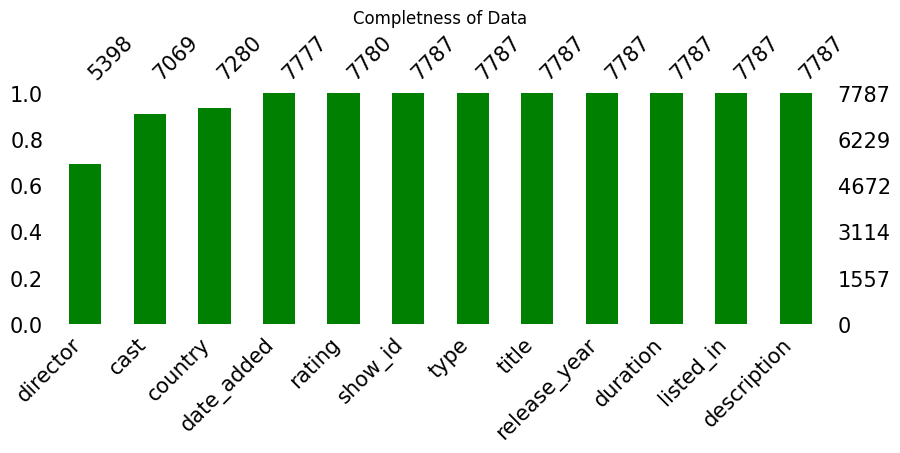

In [9]:
# Visualizing the missing values
import missingno as msno
msno.bar(Netflix_df, color='green',sort='ascending', figsize=(10,3), fontsize=15)
plt.title('Completness of Data')

### What did you know about your dataset?

* There are 7787 rows and 12 columns in the dataset. In the director, cast, country, date_added, and rating columns, there are missing values. The dataset does not contain any duplicate values.

* Every row of information we have relates to a specific movie. Therefore, we are unable to use any method to impute any null values. Additionally, due to the small size of the data, we do not want to lose any data, so after analyzing each column, we simply impute numeric values using an empty string in the following procedure.

## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns
Netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [11]:
# Dataset Describe
Netflix_df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
show_id,7787,7787,s1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,7787,2,Movie,5377,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,7787,7787,3%,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
director,5398,4049,"Raúl Campos, Jan Suter",18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cast,7069,6831,David Attenborough,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,7280,681,United States,2555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_added,7777,1565,"January 1, 2020",118,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_year,7787.0,NaN,NaN,NaN,2013.93258,8.757395,1925.0,2013.0,2017.0,2018.0,2021.0
rating,7780,14,TV-MA,2863,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,7787,216,1 Season,1608,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Variables Description



    show_id : Unique ID for every Movie/Show

    type : Identifier - Movie/Show

    title : Title of the Movie/Show

    director : Director of the Movie/Show

    cast : Actors involved in the Movie/Show

    country : Country where the Movie/Show was produced

    date_added : Date it was added on Netflix

    release_year : Actual Release year of the Movie/Show

    rating : TV Rating of the Movie/Show

    duration : Total Duration - in minutes or number of seasons

    listed_in : Genre

    description : The Summary description


### Check Unique Values for each variable.

In [12]:
# Check Unique Values for each variable.
for i in Netflix_df.columns:
  print("No of unique values in",i,"is",Netflix_df[i].nunique())

No of unique values in show_id is 7787
No of unique values in type is 2
No of unique values in title is 7787
No of unique values in director is 4049
No of unique values in cast is 6831
No of unique values in country is 681
No of unique values in date_added is 1565
No of unique values in release_year is 73
No of unique values in rating is 14
No of unique values in duration is 216
No of unique values in listed_in is 492
No of unique values in description is 7769


## 3. ***Data Wrangling***

### Data Wrangling Code

In [15]:
# Write your code to make your dataset analysis ready.
netflix_df = Netflix_df.copy()

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### 1. What is the distribution of TV Shows and Movies in the dataset?

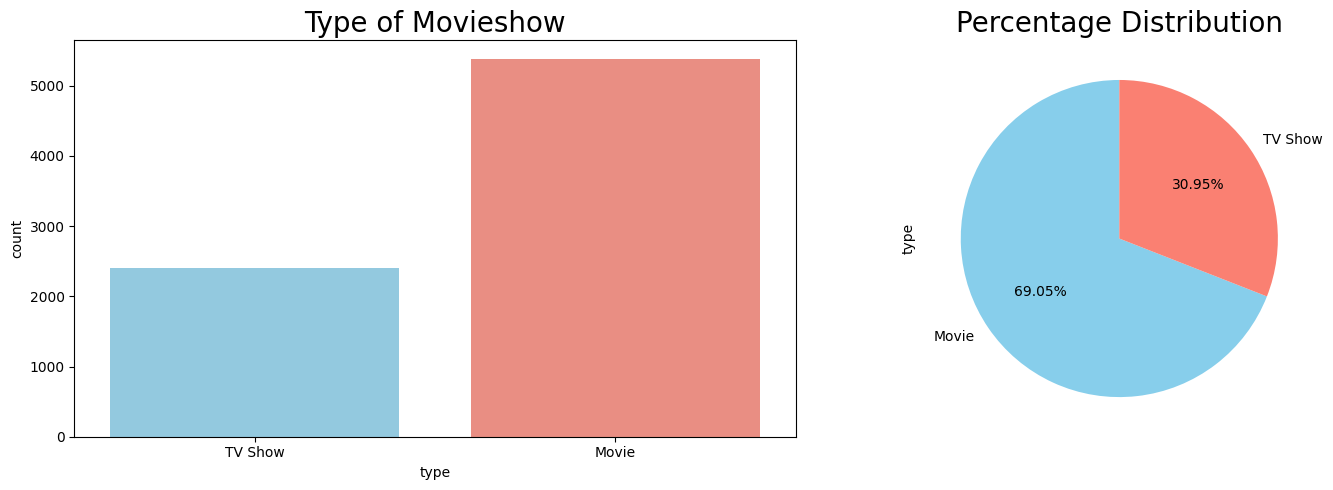

In [16]:
# Chart - 1 visualization code

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Countplot
graph = sns.countplot(x='type', data=Netflix_df, ax=ax[0], palette=['skyblue', 'salmon'])
graph.set_title('Type of Movieshow', size=20)

# Pie chart
netflix_df['type'].value_counts().plot(kind='pie', autopct='%1.2f%%', ax=ax[1], startangle=90, colors=['skyblue', 'salmon'])
ax[1].set_title('Percentage Distribution', size=20)

plt.tight_layout()
plt.show()

##### 2. What is/are the insight(s) found from the chart?

* we can see that here more number of movies is listed as compare to Tv show
* 31% of the data are from TV shows, while 69% of the data are from movies.

#### 2- Find top 10 countries with the highest number of Tv show and Movie.

In [17]:
#Number of unique country

unique_countries = netflix_df['country'].nunique()
print(f'The number of unique country is: {unique_countries}')

The number of unique country is: 681


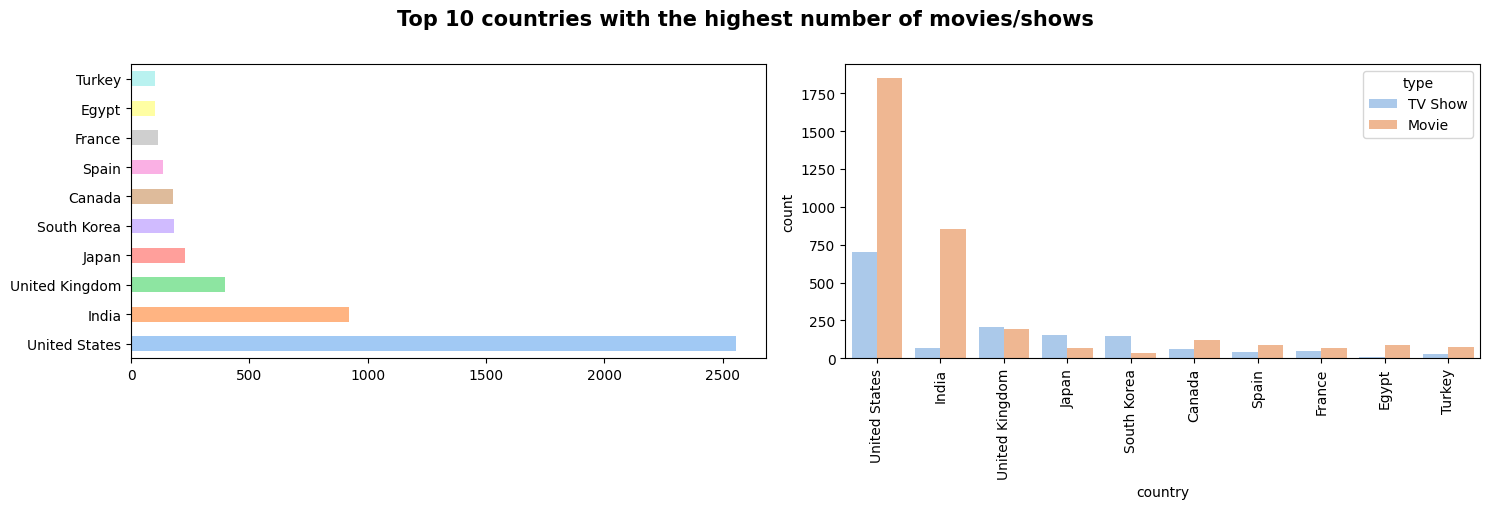

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
plt.suptitle('Top 10 countries with the highest number of movies/shows', weight='bold', size=15, y=1.01)

# Univariate analysis
netflix_df['country'].value_counts().nlargest(10).plot(kind='barh', ax=ax[0], color=sns.color_palette('pastel'))

# Bivariate analysis
graph = sns.countplot(x='country', data=netflix_df, hue='type', order=netflix_df['country'].value_counts().index[0:10], ax=ax[1], palette='pastel')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

##### 2. What is/are the insight(s) found from the chart?

* The United States-based movies and TV shows were produced most, followed by India and the United Kingdom.
* In India and United State, a greater number of movies are present compared to TV shows.
* In the UK, Japan, and South Korea there are a greater number of TV shows than movies.

#### 3 -  Find number of Tvshow and Movie release in last 15 year.

In [19]:
# Find oldest and latest release year for TV Shows

oldest_release_year_tvshows = netflix_df[netflix_df['type'] == 'TV Show']['release_year'].min()
latest_release_year_tvshows = netflix_df[netflix_df['type'] == 'TV Show']['release_year'].max()

print(f'Oldest release year for TV Shows: {oldest_release_year_tvshows}')
print(f'Latest release year for TV Shows: {latest_release_year_tvshows}')

# Find oldest and latest release year for Movies

oldest_release_year_movies = netflix_df[netflix_df['type'] == 'Movie']['release_year'].min()
latest_release_year_movies = netflix_df[netflix_df['type'] == 'Movie']['release_year'].max()

print(f'Oldest release year for Movies: {oldest_release_year_movies}')
print(f'Latest release year for Movies: {latest_release_year_movies}')

Oldest release year for TV Shows: 1925
Latest release year for TV Shows: 2021
Oldest release year for Movies: 1942
Latest release year for Movies: 2021


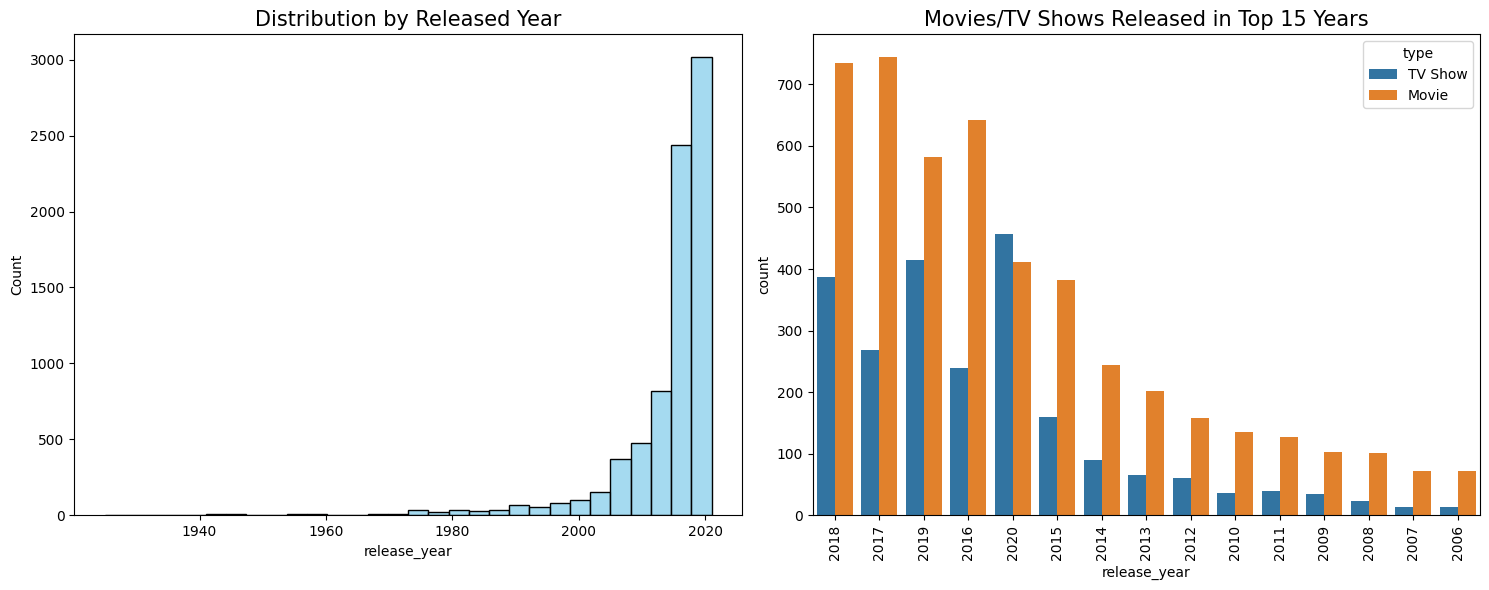

In [20]:
fig,ax = plt.subplots(1,2, figsize=(15,6))

# Univariate analysis
hist = sns.histplot(netflix_df['release_year'], color='skyblue', bins=30, ax=ax[0])
hist.set_title('Distribution by Released Year', size=15)

# Bivariate analysis
count = sns.countplot(x="release_year", hue='type', data=netflix_df, order=netflix_df['release_year'].value_counts().index[0:15],ax=ax[1])
count.set_title('Movies/TV Shows Released in Top 15 Years', size=15)
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

##### 2. What is/are the insight(s) found from the chart?

* Netflix starts releasing more Movies/TV shows in recent years compared to old ones.
* Most Movies and TV shows are release on Netflix between 2015 and 2020, and the highest are in 2018.

####  4 - Analyse  Ratings for Movie and Tv shows.

---



In [21]:
# number of unique Rating

print(f'The number of unique rating: {netflix_df.rating.nunique()}')

The number of unique rating: 14


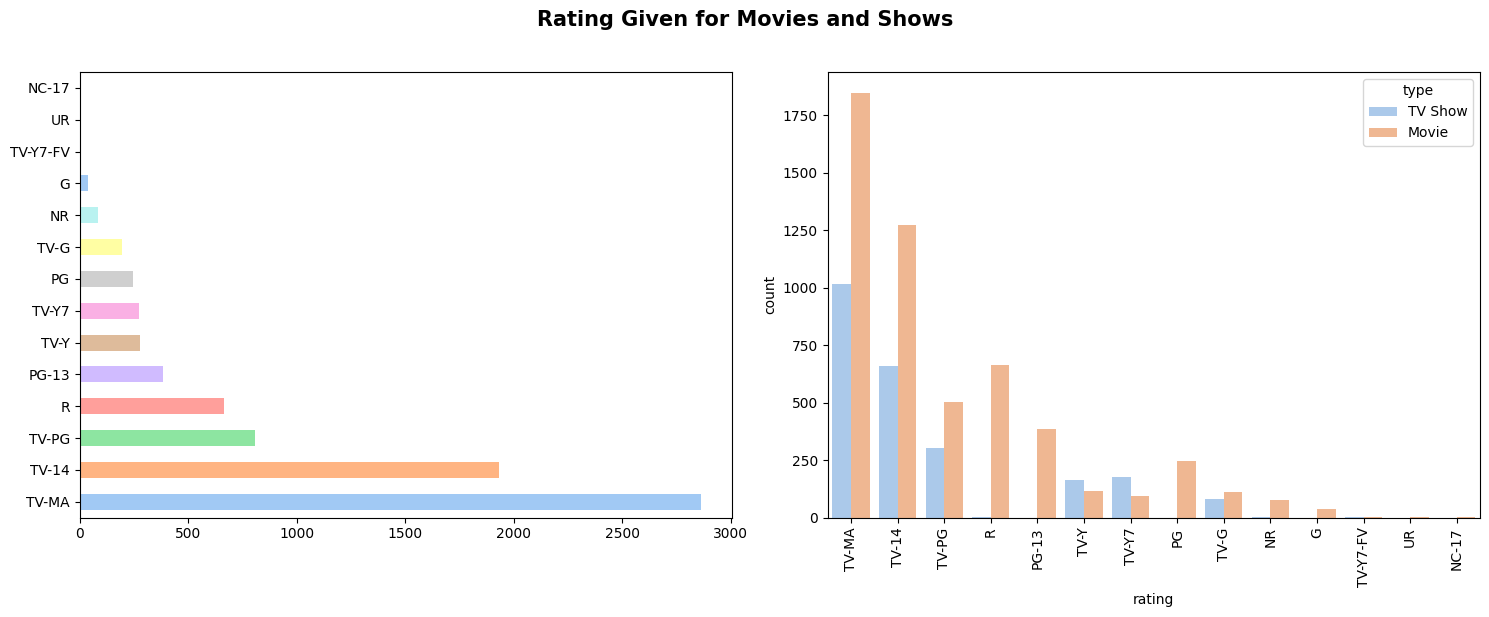

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
plt.suptitle('Rating Given for Movies and Shows', weight='bold', y=1.02, size=15)

# Univariate analysis with default color palette
#sns.countplot(x="rating", data=netflix_df, order=netflix_df['rating'].value_counts().index, ax=ax[0])
netflix_df['rating'].value_counts().plot(kind='barh', ax=ax[0], color=sns.color_palette('pastel'))

# Bivariate analysis with a specific color palette
graph = sns.countplot(x="rating", data=netflix_df, hue='type', order=netflix_df['rating'].value_counts().index, ax=ax[1], palette='pastel')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

##### 2. What is/are the insight(s) found from the chart?

* The majority of Movies and TV shows have a rating of TV-MA, which stands for "Mature Audience," followed by TV-14, which stands for "Younger Audience."
* When compared to TV shows, Movies receive the highest rating, which is pretty obvious given that a number of Movies are higher compared to TV shows, as we saw earlier in the type column.

####  5 - Avg movie duration of top 10 countries.

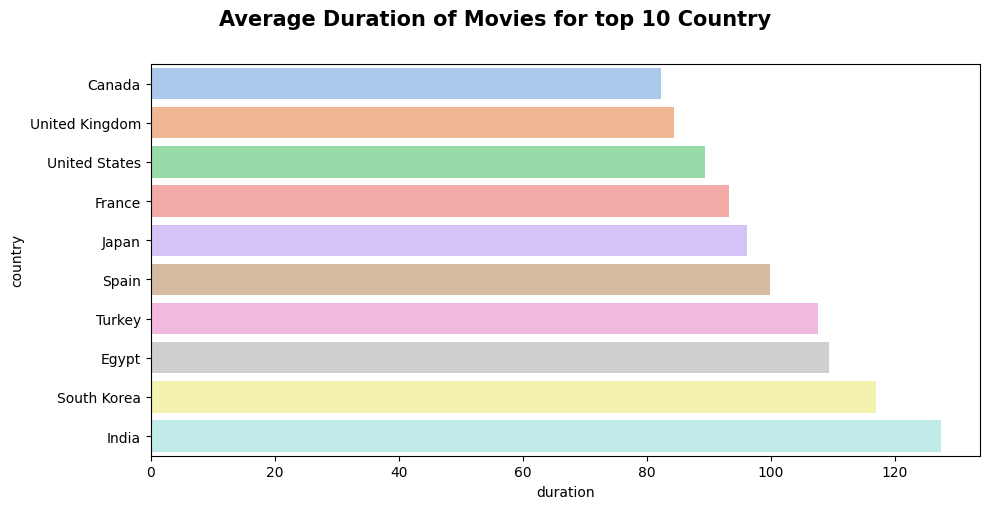

In [23]:

# Convert 'duration' column to numeric values

netflix_df['duration'] = netflix_df['duration'].str.extract('(\d+)').astype(float)

# Create a figure with one subplot
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
plt.suptitle('Average Duration of Movies for top 10 Country', weight='bold', size=15, y=1.01)

# Bivariate analysis - Average duration of movies for the top 10 countries
top_countries_list = netflix_df['country'].value_counts().nlargest(10).index
avg_duration_by_top_countries = netflix_df[netflix_df['type'] == 'Movie'][netflix_df['country'].isin(top_countries_list)].groupby('country')['duration'].mean().reset_index()

# Sort the DataFrame by average duration in ascending order
avg_duration_by_top_countries = avg_duration_by_top_countries.sort_values(by='duration', ascending=True)

# Bar plot for average duration of movies
sns.barplot(x='duration', y='country', data=avg_duration_by_top_countries, ax=ax, palette='pastel')

plt.tight_layout()
plt.show()

##### 2. What is/are the insight(s) found from the chart?



*   India has the longest average movie duration among the listed countries.
*  United States and Canada have shorter average movie durations compared to other countries.  


#### 6 - Get top 10 longest movie.

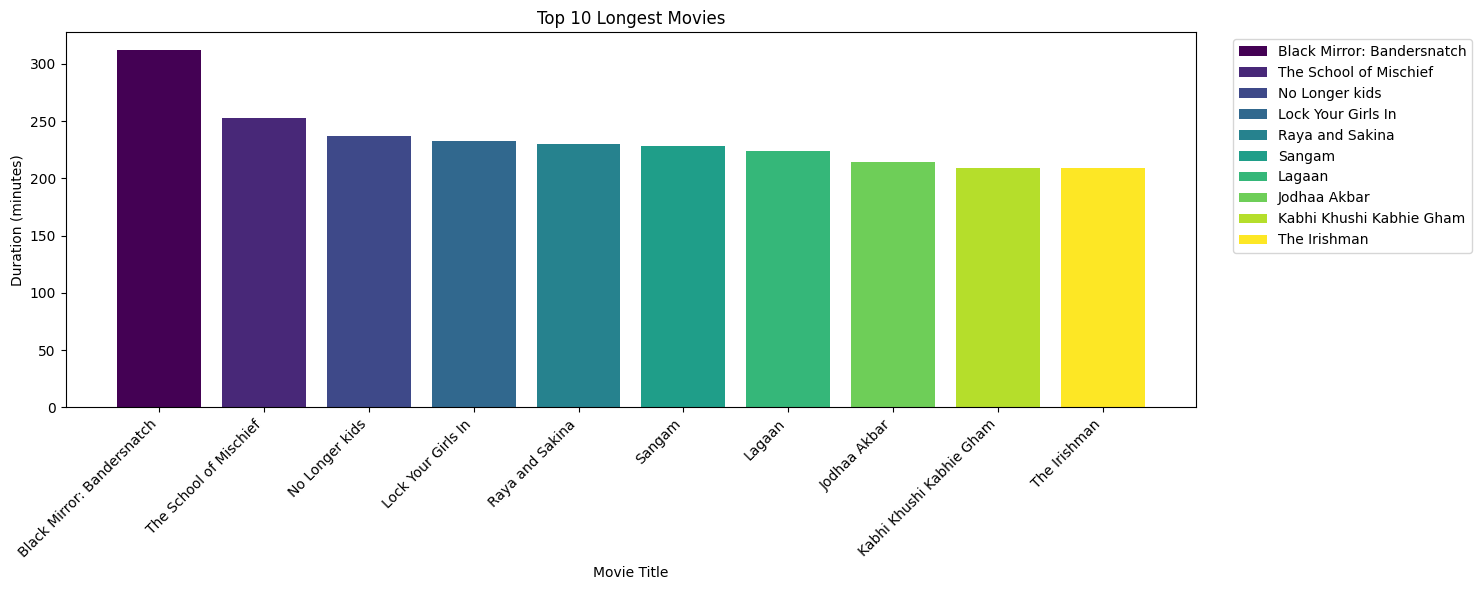

In [24]:
# Drop rows with missing 'duration'
df_cleaned = netflix_df.dropna(subset=['duration'])

# Sort the DataFrame by duration in descending order
df_sorted = df_cleaned.sort_values(by='duration', ascending=False)

# Extract the top 10 longest movies
top10_longest = df_sorted.head(10)

# Generate a range of colors using a colormap
colors = plt.cm.viridis(np.linspace(0, 1, 10))

# Create a bar chart with different colors for each bar
plt.figure(figsize=(15, 6))
bars = plt.bar(top10_longest['title'], top10_longest['duration'], color=colors)
plt.title('Top 10 Longest Movies')
plt.xlabel('Movie Title')
plt.ylabel('Duration (minutes)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Add a color legend
plt.legend(bars, top10_longest['title'], loc='upper right', bbox_to_anchor=(1.25, 1))

plt.tight_layout()
plt.show()

##### 2. What is/are the insight(s) found from the chart?



*    “Black Mirror: Bandersnatch” is the longest movie, with a duration exceeding 300 minutes.
*   The chart provides a comparison of the durations of the top 10 longest movies. Other movies like “The School of Mischief,” “No Longer kids,” etc., have durations ranging from approximately 150 to less than 300 minutes.



####  7 - Visualize top 10 frequent director and  their show type.



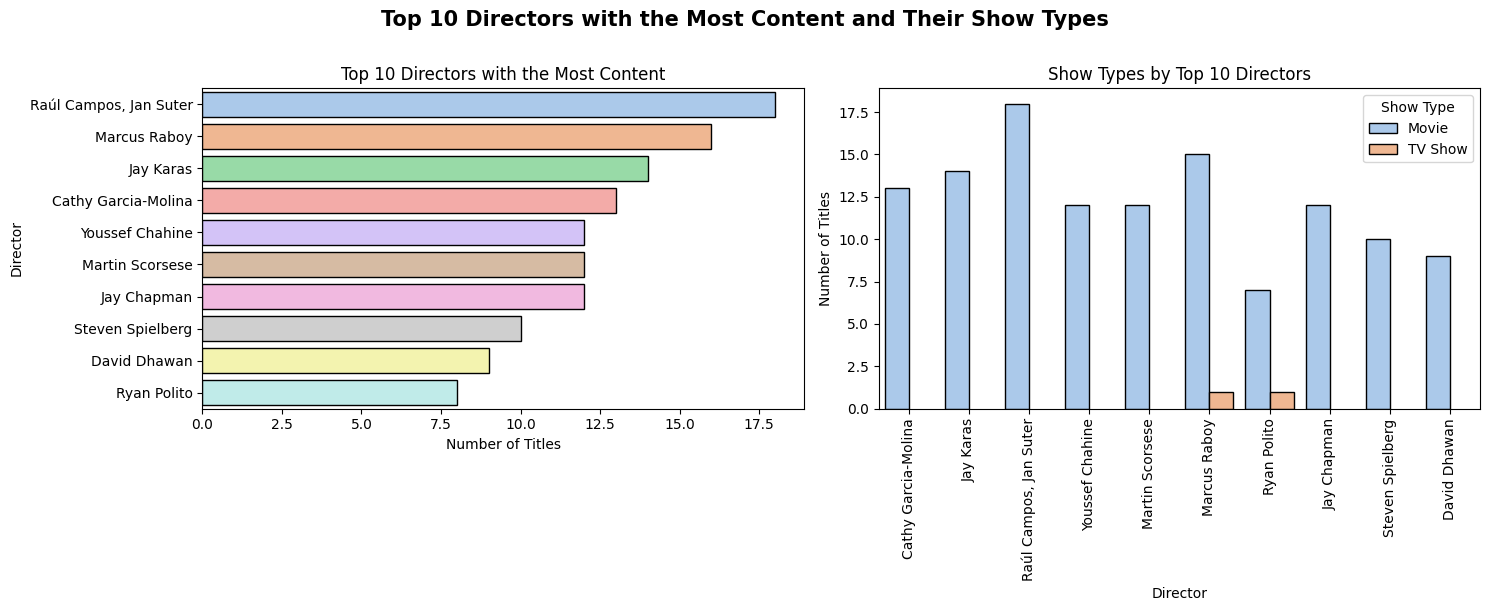

In [25]:
# Find the top 10 directors with the most content
top_directors_df = netflix_df['director'].value_counts().nlargest(10).reset_index(name='count')

# Filter the dataset for the top 10 directors
filtered_df = netflix_df[netflix_df['director'].isin(top_directors_df['index'])]

# Create a figure with a subplot for each visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
plt.suptitle('Top 10 Directors with the Most Content and Their Show Types', weight='bold', size=15, y=1.01)

# Subplot 1: Bar plot for the top 10 directors with the most content
sns.barplot(x='count', y='index', data=top_directors_df, ax=axes[0], palette='pastel', edgecolor='black')
axes[0].set_title('Top 10 Directors with the Most Content')
axes[0].set_xlabel('Number of Titles')
axes[0].set_ylabel('Director')

# Subplot 2: Stacked bar plot for show types by the top 10 directors
sns.countplot(x='director', hue='type', data=filtered_df, ax=axes[1], palette='pastel', edgecolor='black')
axes[1].set_title('Show Types by Top 10 Directors')
axes[1].set_xlabel('Director')
axes[1].set_ylabel('Number of Titles')
axes[1].legend(title='Show Type', labels=['Movie', 'TV Show'], loc='upper right')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

##### 2. What is/are the insight(s) found from the chart?



*  According to data  Raúl Campos and Jan Suter director most of the movie
*   And most of the director preferd to direct movie as compare to tv show



#### 8 - Find top 10 Tv show actor and Movie actor who acted the most of the time.

In [26]:
# seperating actors from cast column
cast = netflix_df['cast'].str.split(', ', expand=True).stack()

# top actors name who play highest role in movie/show.
cast.value_counts()

Anupam Kher         42
Shah Rukh Khan      35
Naseeruddin Shah    30
Om Puri             30
Akshay Kumar        29
                    ..
Archie Alemania      1
Demore Barnes        1
Marty Adams          1
Nicole Boivin        1
Rachel Khoo          1
Length: 32881, dtype: int64

In [27]:
print(f"Number of TV Shows actors: {len(netflix_df[netflix_df['type']=='TV Show']['cast'].str.split(', ',expand=True).stack().value_counts())}")
print(f"Number of Movies actors: {len(netflix_df[netflix_df['type']=='Movie']['cast'].str.split(', ', expand=True).stack().value_counts())}")

Number of TV Shows actors: 13585
Number of Movies actors: 23049


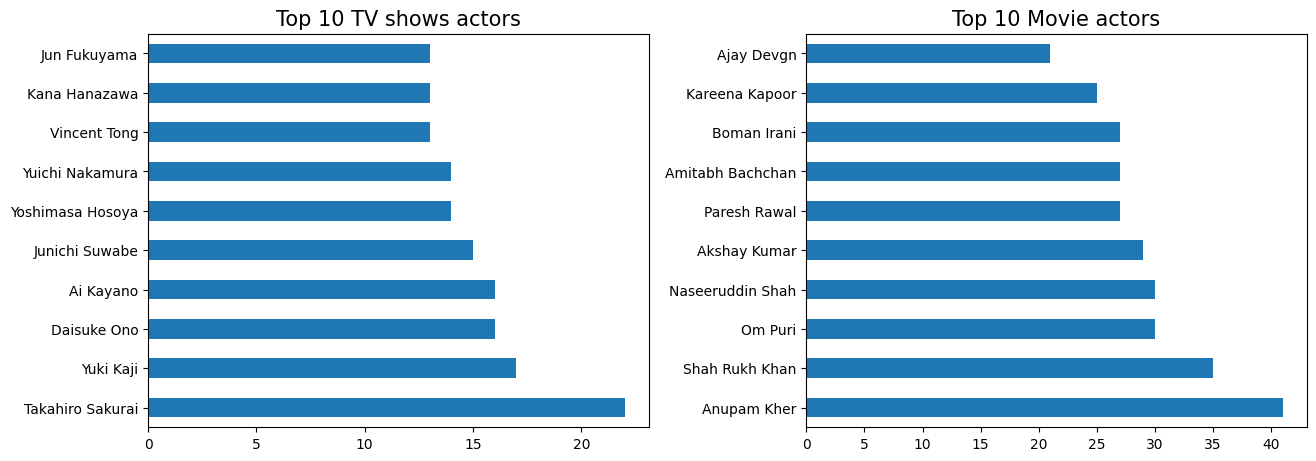

In [28]:
fig,ax = plt.subplots(1,2, figsize=(14,5))

# seperating TV shows actor from cast column
top_TVshows_actor = netflix_df[netflix_df['type']=='TV Show']['cast'].str.split(', ', expand=True).stack()
# plotting actor who appeared in highest number of TV Show
a = top_TVshows_actor.value_counts().head(10).plot(kind='barh', ax=ax[0])
a.set_title('Top 10 TV shows actors', size=15)

# seperating movie actor from cast column
top_movie_actor = netflix_df[netflix_df['type']=='Movie']['cast'].str.split(', ', expand=True).stack()
# plotting actor who appeared in highest number of Movie
b = top_movie_actor.value_counts().head(10).plot(kind='barh', ax=ax[1])
b.set_title('Top 10 Movie actors', size=15)

plt.tight_layout(pad=1.2, rect=[0, 0, 0.95, 0.95])
plt.show()

##### 2. What is/are the insight(s) found from the chart?

* The majority of the roles in the movies are played by Anupam Kher, Shahrukh Khan, and Om Puri.
* In the shows, Takahiro Sakurai, Yuki Kaji, and Daisuke Ono played the most number of roles.

#### 9 - Find top 20 tv shows which has highest number of season

In [29]:
# Filter the dataset for TV shows
tv_shows_df = Netflix_df[Netflix_df['type'] == 'TV Show']

In [30]:
# Extract numeric part from 'duration' column
tv_shows_df['seasons'] = tv_shows_df['duration'].str.extract('(\d+)', expand=False)

# Convert the 'seasons' column to numeric
tv_shows_df['seasons'] = pd.to_numeric(tv_shows_df['seasons'], errors='coerce')

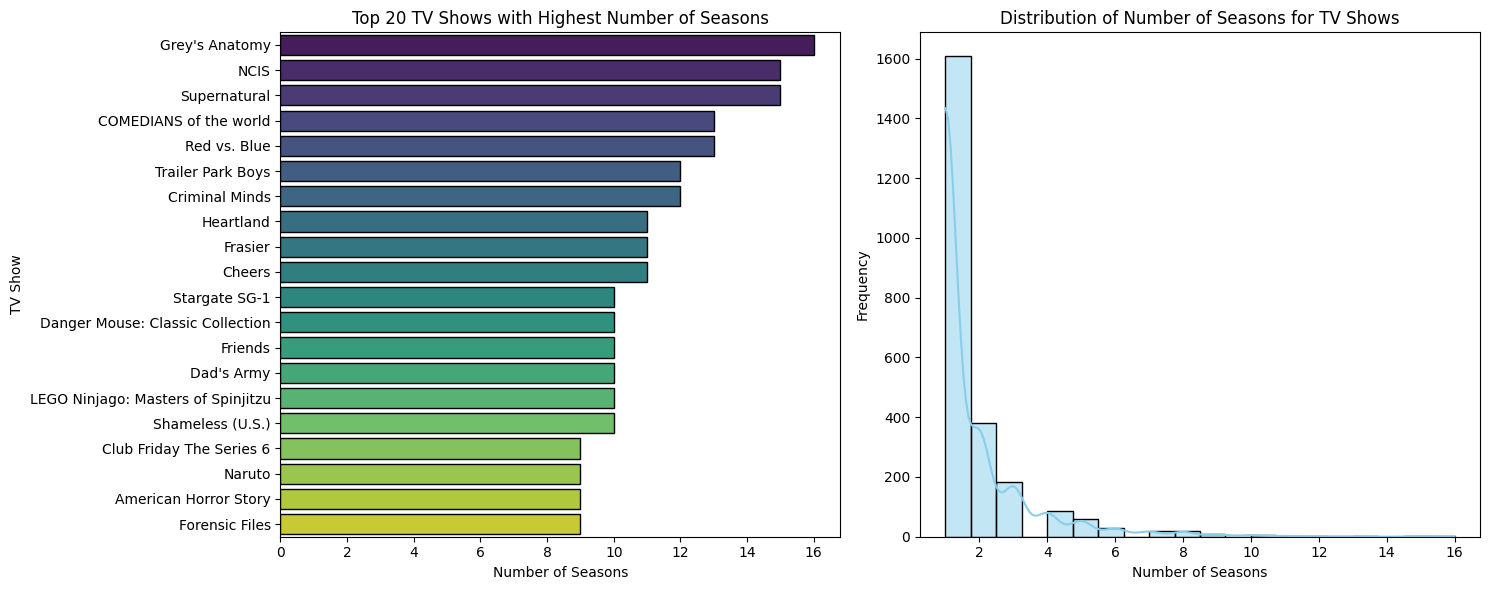

In [31]:
# Set up the subplot with two axes
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot for the top 20 TV shows with highest seasons
top_20_tv_shows = tv_shows_df.groupby('title')['seasons'].max().reset_index()
top_20_tv_shows = top_20_tv_shows.sort_values(by='seasons', ascending=False).head(20)
sns.barplot(x='seasons', y='title', data=top_20_tv_shows, palette='viridis', edgecolor='black', ax=axes[0])
axes[0].set_title('Top 20 TV Shows with Highest Number of Seasons')
axes[0].set_xlabel('Number of Seasons')
axes[0].set_ylabel('TV Show')

# Plot for the distribution of seasons for all TV shows
sns.histplot(tv_shows_df['seasons'], bins=20, kde=True, color='skyblue', edgecolor='black', ax=axes[1])
axes[1].set_title('Distribution of Number of Seasons for TV Shows')
axes[1].set_xlabel('Number of Seasons')
axes[1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

##### 2. What is/are the insight(s) found from the chart?



*   “Grey’s Anatomy” and “NCIS” have the most seasons, with around 16 each.
*   And also see that most number of tv show has only 1 to 2 season



#### 10 - What is the most common genre/category of content in the dataset?

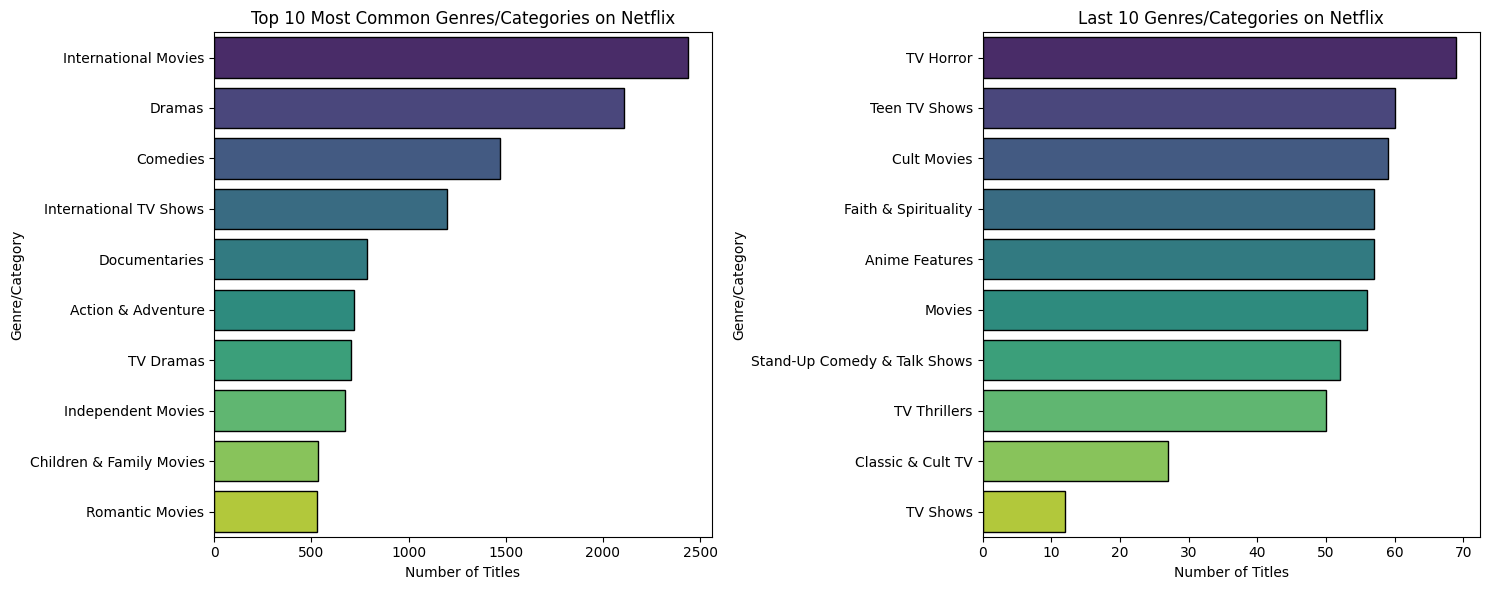

In [31]:
# Split the 'listed_in' column to get individual genres
genres = netflix_df['listed_in'].str.split(', ', expand=True)

# Reshape the DataFrame to have one genre per row
genres_stacked = genres.stack()

# Count the occurrences of each genre
genre_counts = genres_stacked.value_counts()

# Create a subplot with two axes
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot the top 10 most common genres
sns.barplot(x=genre_counts.head(10).values, y=genre_counts.head(10).index, palette='viridis', edgecolor='black', ax=axes[0])
axes[0].set_title('Top 10 Most Common Genres/Categories on Netflix')
axes[0].set_xlabel('Number of Titles')
axes[0].set_ylabel('Genre/Category')

# Plot the last 10 genres
sns.barplot(x=genre_counts.tail(10).values, y=genre_counts.tail(10).index, palette='viridis', edgecolor='black', ax=axes[1])
axes[1].set_title('Last 10 Genres/Categories on Netflix')
axes[1].set_xlabel('Number of Titles')
axes[1].set_ylabel('Genre/Category')

# Adjust layout
plt.tight_layout()
plt.show()


##### 2. What is/are the insight(s) found from the chart?

* International Movies, Dramas, and Comedies make up the majority of the genres.
* TV Shows, Classic and cult TV, TV thrillers, Stand-Up comedy, and Talk shows account for the least genres.

#### 11 - What is the trend in content additions over the years?

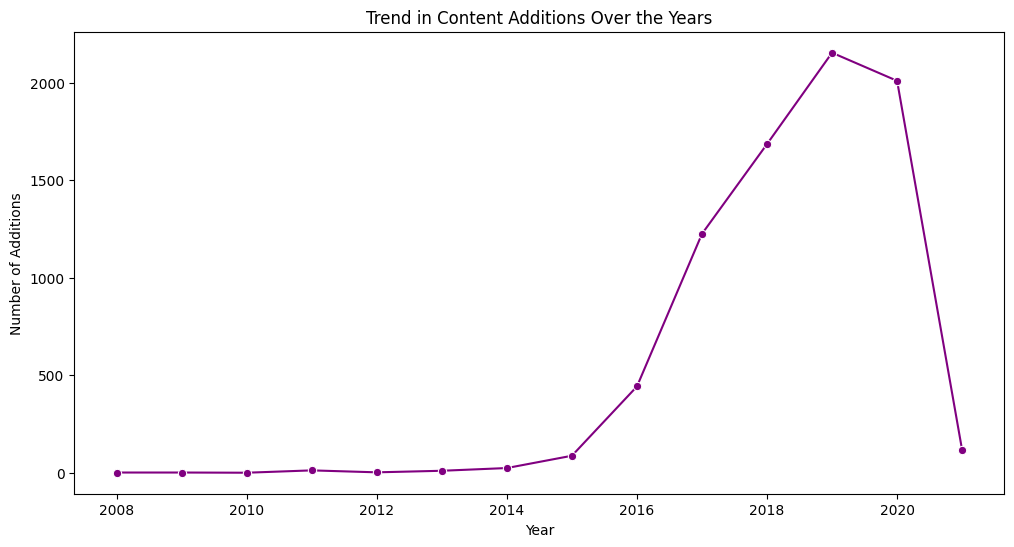

In [32]:
# Convert 'date_added' column to datetime format
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'])

# Extract the year from the 'date_added' column
netflix_df['added_year'] = netflix_df['date_added'].dt.year

# Count the number of additions for each year
content_additions = netflix_df['added_year'].value_counts().sort_index()

# Create a line plot to show the trend
plt.figure(figsize=(12, 6))
sns.lineplot(x=content_additions.index, y=content_additions.values, marker='o', color='purple')

# Add labels and title
plt.title('Trend in Content Additions Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Additions')

# Show the plot
plt.show()

##### 2. What is/are the insight(s) found from the chart?



*   From 2008 to around mid-2016, there’s minimal growth in content additions, staying below or around the mark of approximately 500.
*   There’s a significant spike in content additions starting around mid-2016, peaking at nearly 2000 in about two years (around mid-2018).

*   After reaching its peak in mid-2018, there’s an abrupt decline back down to under approximately 500 by early-mid year of 2020






#### 12 - How many shows or movies were added in each month, and is there a particular month with more additions?

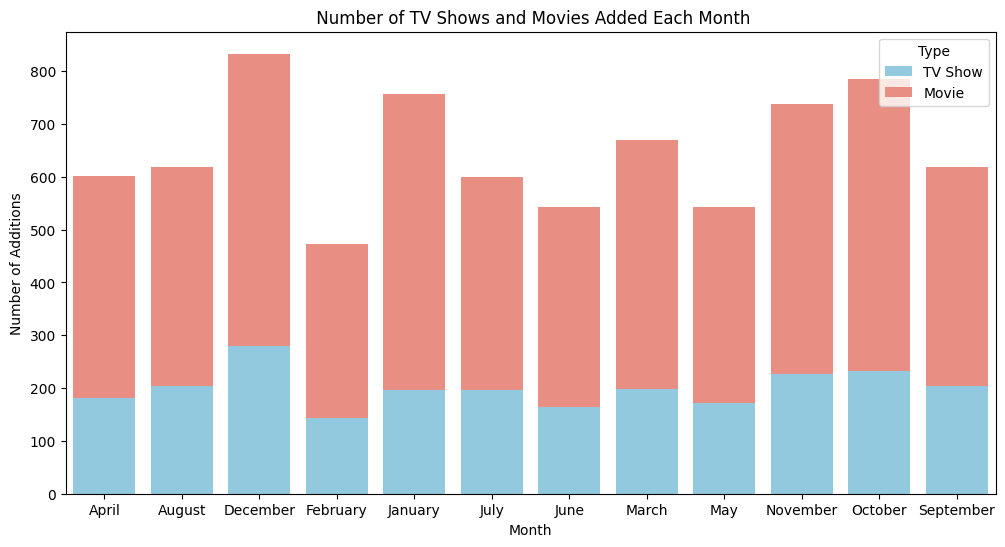

In [33]:
# Convert 'date_added' column to datetime format
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'])

# Extract the month from the 'date_added' column
netflix_df['added_month'] = netflix_df['date_added'].dt.month_name()

# Count the number of TV shows and movies added for each month
content_additions_monthly = netflix_df.groupby(['added_month', 'type']).size().unstack().fillna(0)

# Create a stacked bar plot for bivariate analysis
plt.figure(figsize=(12, 6))
sns.barplot(x=content_additions_monthly.index, y=content_additions_monthly['TV Show'], color='skyblue', label='TV Show')
sns.barplot(x=content_additions_monthly.index, y=content_additions_monthly['Movie'], color='salmon', label='Movie', bottom=content_additions_monthly['TV Show'])

# Add labels and title
plt.title(' Number of TV Shows and Movies Added Each Month')
plt.xlabel('Month')
plt.ylabel('Number of Additions')
plt.legend(title='Type', loc='upper right')

# Show the plot
plt.show()

##### 2. What is/are the insight(s) found from the chart?

 The number of additions varies from month to month. December has the highest combined total of TV show and movie additions, while February has the lowest.

#### 13 - Find most frequent word used in movie title

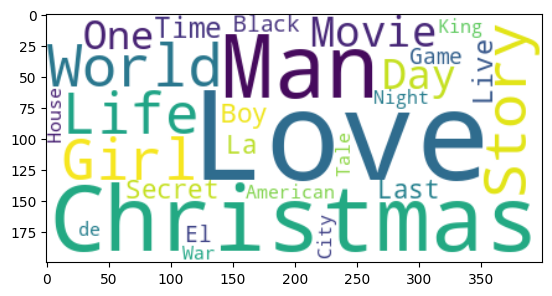

In [34]:
# text documents
text = " ".join(word for word in netflix_df['title'])

# create the word cloud using WordCloud library
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', min_font_size=15).generate(text)

# plot the word cloud
plt.imshow(wordcloud,  interpolation='bilinear')
plt.show()


##### 2. What is/are the insight(s) found from the chart?

* Words like 'Love', 'Christmas', 'Man', 'World', 'Life', 'Girl', and 'Story' are frequently for movie title.

#### 14 - Find most Frequent words use for Description of the movie.

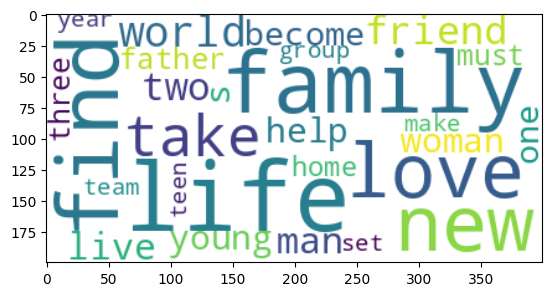

In [35]:
# text documents
text = " ".join(word for word in netflix_df['description'])

# create the word cloud using WordCloud library
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', min_font_size=15).generate(text)

# plot the word cloud
plt.imshow(wordcloud,  interpolation='bilinear')
plt.show()

##### 2. What is/are the insight(s) found from the chart?

* The most frequently used words in the description column are "family," "find," "life," "love," "new world," and "friend."

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [36]:
# Missing Values/Null Values Count
print(Netflix_df.isnull().sum())

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64


In [37]:
# Handling Missing Values & Missing Value Imputation
# Handling Missing Values & Missing Value Imputation
Netflix_df[['director','cast','country']] = netflix_df[['director','cast','country']].fillna('Unknown')
Netflix_df.dropna(axis=0, inplace=True)

In [38]:
# checking for null values after treating them.
Netflix_df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

### 2. Handling Outliers

<Axes: >

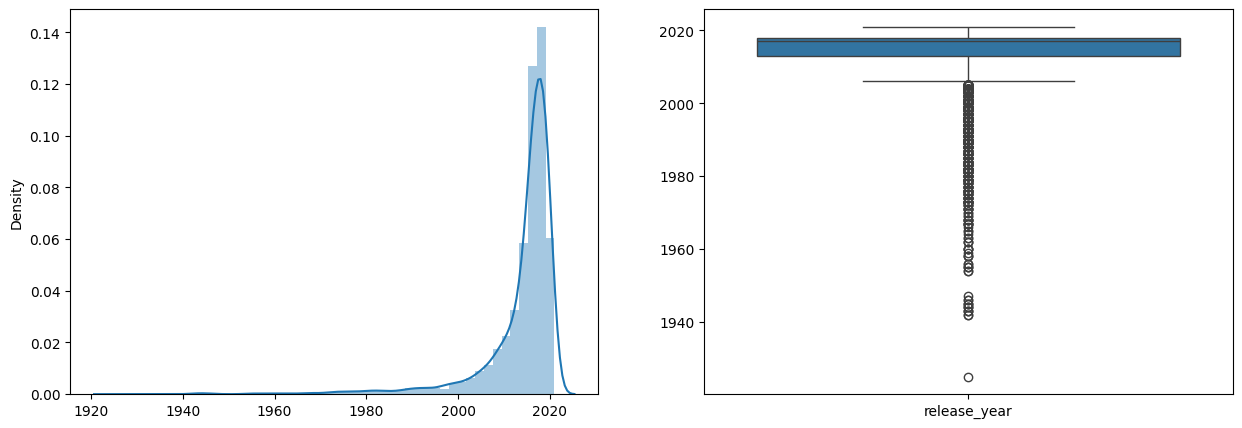

In [39]:
# Handling Outliers & Outlier treatments
# plotting graph
fig,ax = plt.subplots(1,2, figsize=(15,5))

# Display boxplot and dist plot.
sns.distplot(x=Netflix_df['release_year'], ax=ax[0])
sns.boxplot(data=Netflix_df, ax=ax[1])

##### What all outlier treatment techniques have you used and why did you use those techniques?

* Except for the release year, almost all of the data are presented in text format.
* The textual format contains the data we need to build a cluster/building model. Therefore, there is no need to handle outliers.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)




*   Textual data preprocessing is the process of preparing text data for analysis or modeling. It includes a series of steps that are applied to raw text data in order to clean, organize and standardize it so that it can be easily analyzed or used as input for natural language processing or machine learning models. The preprocessing steps typically include tokenization, stop-word removal, stemming or lemmatization, lowercasing, removing punctuation, and removing numbers. The goal of textual data preprocessing is to prepare the data for further analysis and modeling by removing irrelevant information and standardizing the format of the text. This can help improve the accuracy and effectiveness of the analysis or modeling.




#### 1. Modeling Approach

1.   Choose the attributes that you want to cluster.
2.   Text Preprocessing: Change all textual data to lowercase and eliminate all punctuation marks and stopwords. Removing commonly occurring words such as "the", "and", "a", etc. that don't carry much meaning.
3.   Stemming or Lemmatization: Normalizing the words by reducing them to their base form.
4.   Tokenization: Breaking the text into smaller units, such as sentences or words.
5.   Dimensionality reduction.
6.   Make use of various algorithms to cluster the movies and various techniques to determine the optimal number of clusters.
7.   Build the optimal number of clusters and use wordclouds to display the contents of each cluster.

In [40]:
# DAtaset look
Netflix_df.head(2)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...


We will cluster the Netflix movies and TV shows into groups based on the following textual characteristics:
* Director
* Cast
* Country
* Rating
* Listed in (genres)
* Description

In [41]:
# creating tags column using all text column which one is used for model building purpose.

cluster_df = Netflix_df[['title']]
Netflix_df[['description','listed_in','director','cast','country','rating']]=Netflix_df[['description','listed_in','director','cast','country','rating']].astype(str)
cluster_df['cluster_data'] = (Netflix_df['description'] + ' ' + Netflix_df['listed_in'] + ' ' + Netflix_df['director'] + ' ' +\
                              Netflix_df['cast'] + ' ' + Netflix_df['country'] + ' ' + Netflix_df['rating'])
cluster_df.set_index('title', inplace = True)
cluster_df.head()
cluster_df.head()

,cluster_data
title,
3%,In a future where the elite inhabit an island ...
7:19,After a devastating earthquake hits Mexico Cit...
23:59,"When an army recruit is found dead, his fellow..."
9,"In a postapocalyptic world, rag-doll robots hi..."
21,A brilliant group of students become card-coun...


#### 2.Removing Stop words and Lower Casing.

In [42]:
# create a set of English stop words
stop_words = stopwords.words('english')

# displaying stopwords
np.array(stop_words)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [43]:
# Create a function for removing Lower Casing and stop words

def stopwords(text):
    '''a function for removing the stopword and lowercase the each word'''
    text = [word.lower() for word in text.split() if word.lower() not in stop_words]
    # joining the list of words with space separator
    return " ".join(text)


In [44]:
# applying stopwords function.

cluster_df['cluster_data'] = cluster_df['cluster_data'].apply(stopwords)

In [45]:
# checking the first row
cluster_df['cluster_data'][0]

'future elite inhabit island paradise far crowded slums, get one chance join 3% saved squalor. international tv shows, tv dramas, tv sci-fi & fantasy unknown joão miguel, bianca comparato, michel gomes, rodolfo valente, vaneza oliveira, rafael lozano, viviane porto, mel fronckowiak, sergio mamberti, zezé motta, celso frateschi brazil tv-ma'

#### 3. Removing Punctuations

In [46]:
# function to remove punctuations

def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, which in effect deletes the punctuation marks.
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [47]:
# applying remove_punctuation function
cluster_df['cluster_data'] = cluster_df['cluster_data'].apply(remove_punctuation)

In [48]:
# checking the first row
cluster_df['cluster_data'][0]

'future elite inhabit island paradise far crowded slums get one chance join 3 saved squalor international tv shows tv dramas tv scifi  fantasy unknown joão miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zezé motta celso frateschi brazil tvma'

#### 4. Stemming process

Stemming is the process of reducing a word to its base or root form. This is a common pre-processing step in natural language processing (NLP) tasks and text analysis. The goal of stemming is to reduce words to their base form so that words with the same stem are treated as the same word, even if they are written in different forms. For example, stemming would reduce "running," "runner," and "ran" to the base form "run." This can be useful in tasks such as information retrieval or text classification where the specific form of a word is not important, and it can also help in reducing the size of the vocabulary. There are several stemmers available in python such as Porter stemmer, Snowball stemmer and Lancaster stemmer.

In [49]:
# create an object of stemming function
stemmer = SnowballStemmer("english")

# define a function to apply stemming using SnowballStemmer
def stemming(text):
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)

In [50]:
# appying stemming function
cluster_df['cluster_data'] = cluster_df['cluster_data'].apply(stemming)

In [51]:
# checking the first row
cluster_df['cluster_data'][0]

'futur elit inhabit island paradis far crowd slum get one chanc join 3 save squalor intern tv show tv drama tv scifi fantasi unknown joão miguel bianca comparato michel gome rodolfo valent vaneza oliveira rafael lozano vivian porto mel fronckowiak sergio mamberti zezé motta celso frateschi brazil tvma'

#### 5. Text Vectorization

Text vectorization is the process of converting text data into numerical vectors or feature representations that can be used for machine learning or data analysis tasks. In simple terms, it transforms the text data into numerical data which can be easily processed by machine learning algorithms. There are several text vectorization techniques available such as bag of words, Tf-idf, Word2vec, and GloVe etc.

* We will be using the TF-IDF vectorizer, which stands for Term Frequency Inverse Document Frequency
* TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document). The more often a word appears in a document, the higher its TF score.
* IDF(t) = IDF measures how rare a word is across all the documents in the corpus. The rarer a word, the higher its IDF score.
* The product of TF and IDF is used to calculate the overall weight of a word in a document, which is known as the TF-IDF score. Words with high TF-IDF scores are considered to be more important and relevant to the document than words with low TF-IDF scores.

In [52]:
# create the object of tfid vectorizer
tfidf = TfidfVectorizer(stop_words='english', lowercase=False, max_features = 10000)   # max features = 10000 to prevent system from crashing

# fit the vectorizer using the text data
tfidf.fit(cluster_df['cluster_data'])

# collect the vocabulary items used in the vectorizer
dictionary = tfidf.vocabulary_.items()

In [53]:
#number of independet features created from "text_data" columns
print(len(dictionary))

10000


In [55]:
# convert vector into array form for clustering
vector = tfidf.transform(cluster_df['cluster_data']).toarray()

# summarize encoded vector
print(vector)
print(f'shape of the vector : {vector.shape}')
print(f'datatype : {type(vector)}')

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
shape of the vector : (7770, 10000)
datatype : <class 'numpy.ndarray'>


#### 6. Dimensionality Reduction

Dimensionality reduction is the process of reducing the number of features or dimensions in a dataset while retaining as much information as possible. The main goal of dimensionality reduction is to simplify the data while minimizing the loss of information. It is a crucial step in machine learning and data analysis as it can help to improve the performance of models, reduce overfitting, and make it easier to visualize and interpret the data.

* There are several techniques used for dimensionality reduction, such as:
Principal Component Analysis (PCA), Linear Discriminant Analysis (LDA), t-Distributed Stochastic Neighbor Embedding (t-SNE), Autoencoder, and Random Projection etc.
* We will use Principal Component Analysis (PCA) to reduce the dimensionality of data.

In [56]:
# using PCA to reduce dimensionality
pca = PCA(random_state=42)
pca.fit(vector)

PCA(random_state=42)

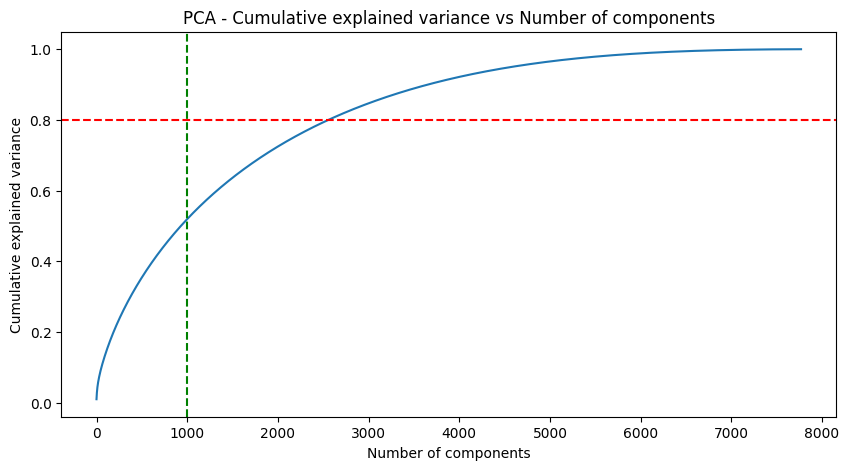

In [57]:
# Explained variance for different number of components
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA - Cumulative explained variance vs Number of components')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.axhline(y= 0.8, color='red', linestyle='--')
plt.axvline(x= 1000, color='green', linestyle='--')
plt.show()

* We discover that approximately 2500 components account for 100 percent of the variance.
* 1500 components alone account for more than 80% of the variance.
* Therefore, we can take the top 1000 components to reduce dimensionality and simplify the model while still being able to capture more than 80% of the variance.

In [65]:
# reducing the dimensions to 1500 using pca

pca = PCA(n_components=1500, random_state=42)
pca.fit(vector)

PCA(n_components=1500, random_state=42)

In [66]:
# transformed features
X = pca.transform(vector)

# shape of transformed vectors
X.shape

(7770, 1500)

## ***7. ML Model Implementation***

### ML Model - 1(K-Means Clustering)



# *   Using Elbow Method for finding optimum value of k



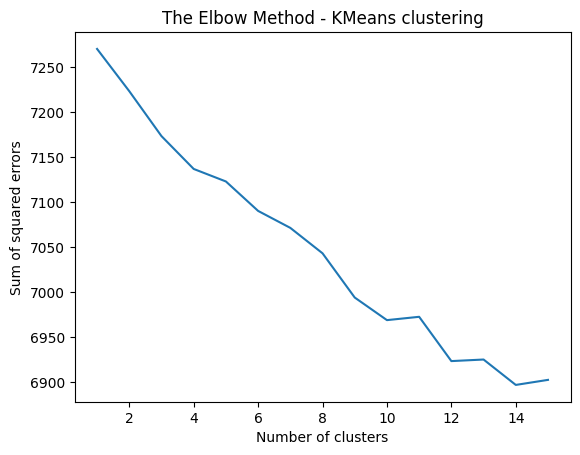

In [67]:
'''Elbow method to find the optimal value of K'''

# Initialize a list to store the sum of squared errors for each value of K
SSE = []

for k in range(1, 16):
  # Initialize the k-means model with the current value of K
  kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
  # Fit the model to the data
  kmeans.fit(X)
  # Compute the sum of squared errors for the model
  SSE.append(kmeans.inertia_)

# Plot the values of SSE
plt.plot(range(1, 16), SSE)
plt.title('The Elbow Method - KMeans clustering')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared errors')
plt.show()



*   The sum of squared distance between each point and the centroid in a cluster decreases with the increase in the number of clusters.




In [ ]:
kmeans = KMeans(n_clusters = 6)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)


plt.figure(figsize=(10 , 6))
plt.title('description and listed_in')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='spring')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)



# *  Using Silhoutte score for finding optimum value of k



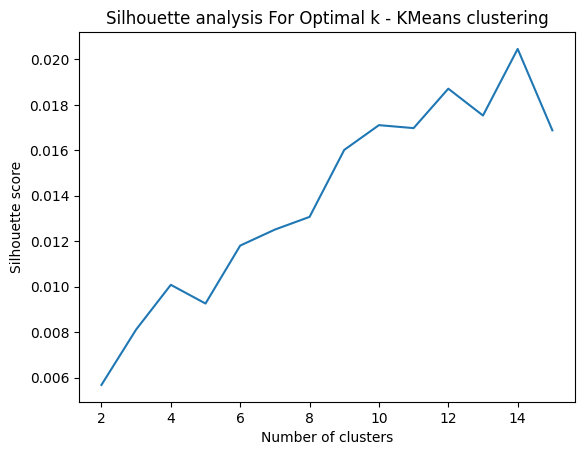

In [70]:
'''Silhouette score method to find the optimal value of k'''

# Initialize a list to store the silhouette score for each value of k
silhouette_avg = []

for k in range(2, 16):
  # Initialize the k-means model with the current value of k
  kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
  # Fit the model to the data
  kmeans.fit(X)
  # Predict the cluster labels for each point in the data
  labels = kmeans.labels_
  # Compute the silhouette score for the model
  score = silhouette_score(X, labels)
  silhouette_avg.append(score)

# Plot the Silhouette analysis
plt.plot(range(2,16), silhouette_avg)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k - KMeans clustering')
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.006796877356029279
For n_clusters = 3 The average silhouette_score is : 0.0077537601351084385
For n_clusters = 4 The average silhouette_score is : 0.007280582792476461
For n_clusters = 5 The average silhouette_score is : 0.01227609983265648
For n_clusters = 6 The average silhouette_score is : 0.012217623590062964
For n_clusters = 7 The average silhouette_score is : 0.013426523049326592
For n_clusters = 8 The average silhouette_score is : 0.01379758405709294
For n_clusters = 9 The average silhouette_score is : 0.015229356493207537
For n_clusters = 10 The average silhouette_score is : 0.0168097186133864
For n_clusters = 11 The average silhouette_score is : 0.016698327642686743
For n_clusters = 12 The average silhouette_score is : 0.01856416680539743
For n_clusters = 13 The average silhouette_score is : 0.018682326561452387
For n_clusters = 14 The average silhouette_score is : 0.020141426077411352
For n_clusters = 15 The average silho

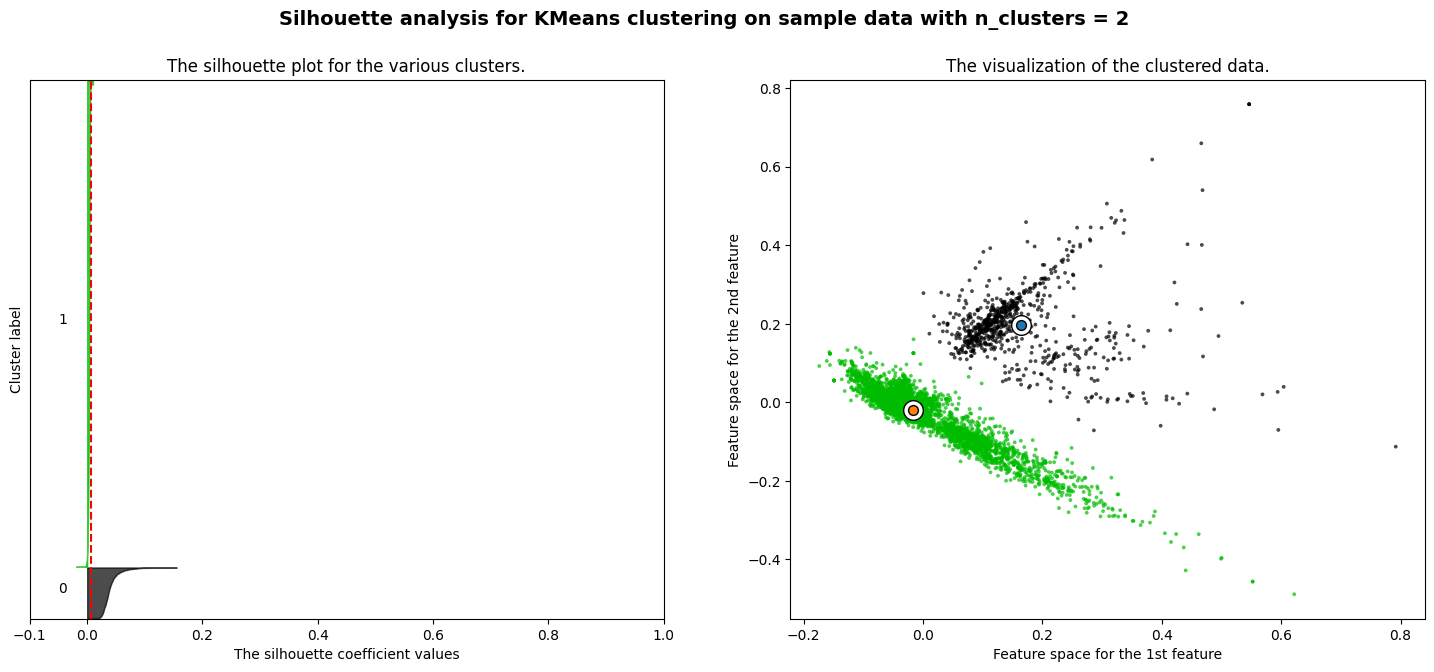

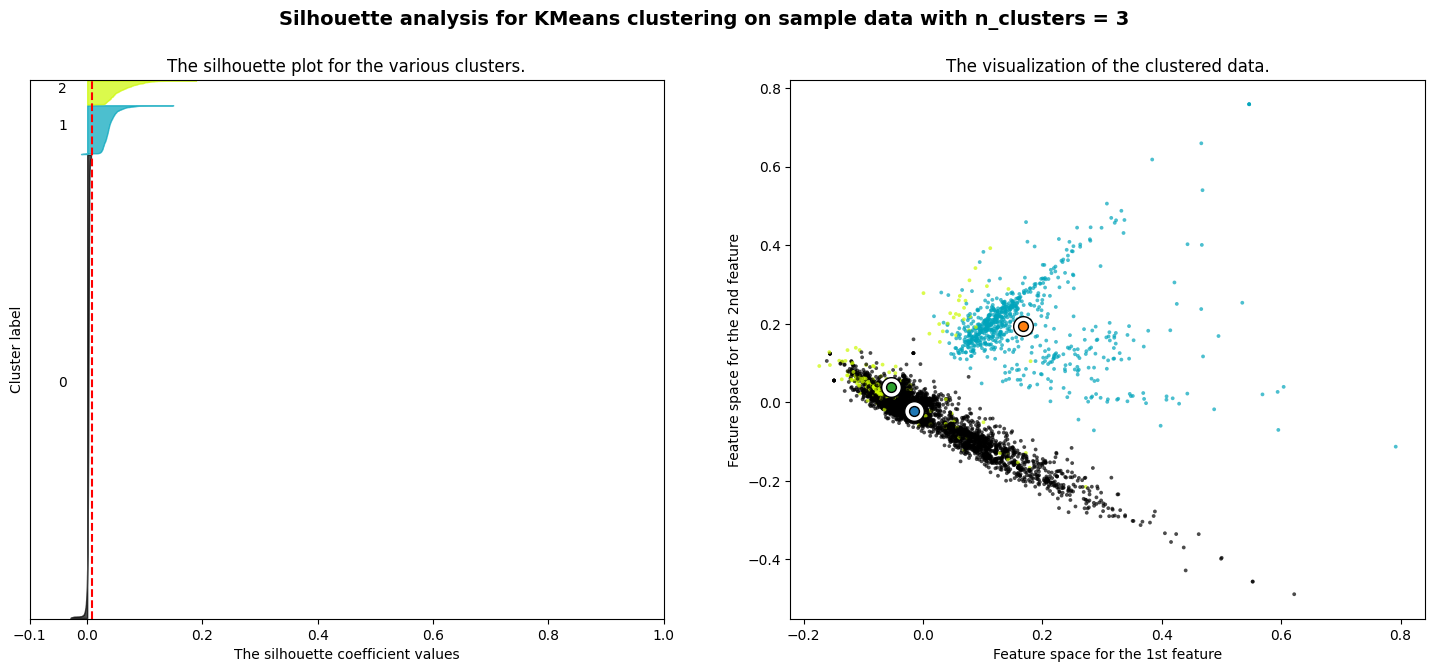

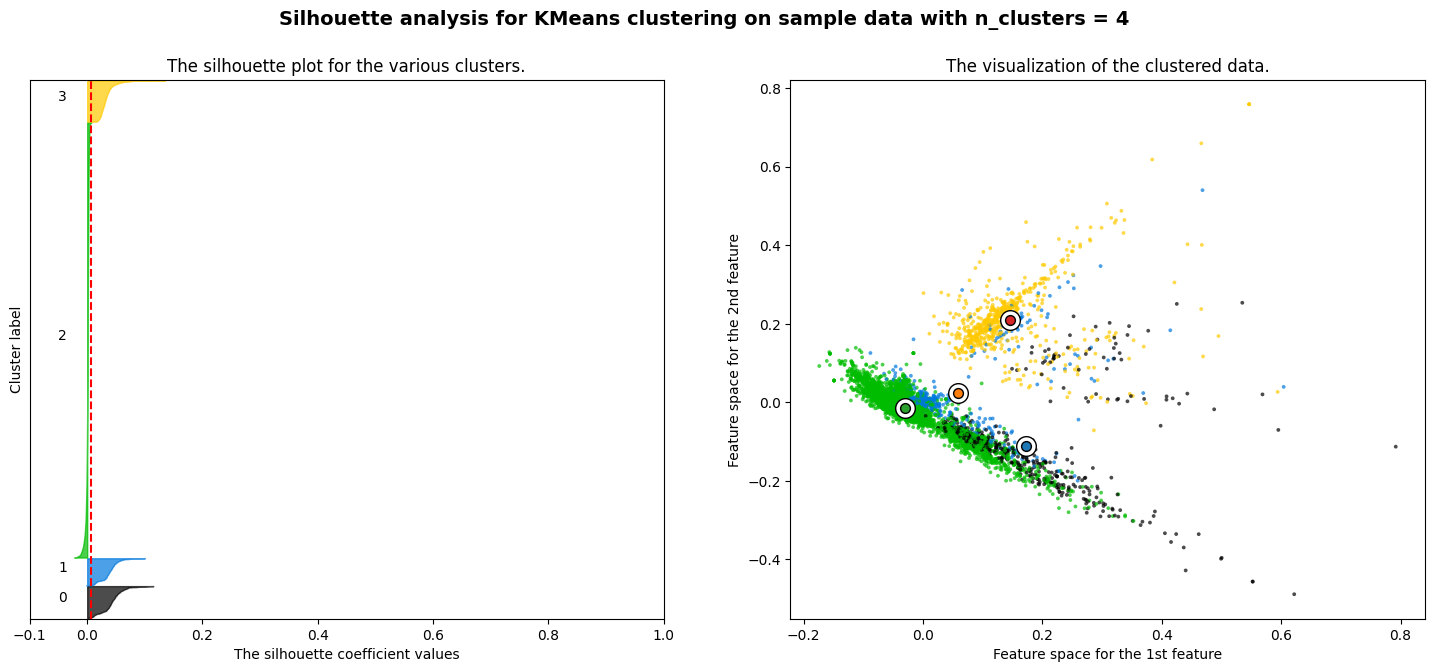

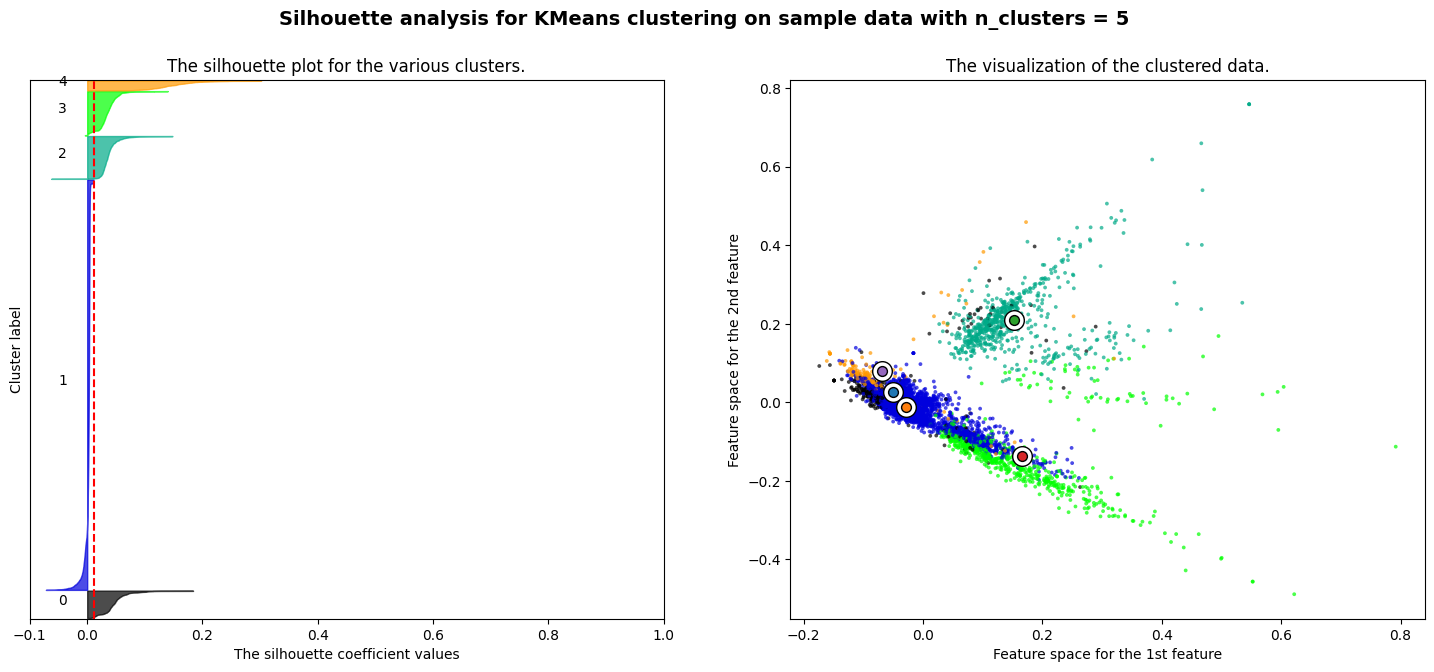

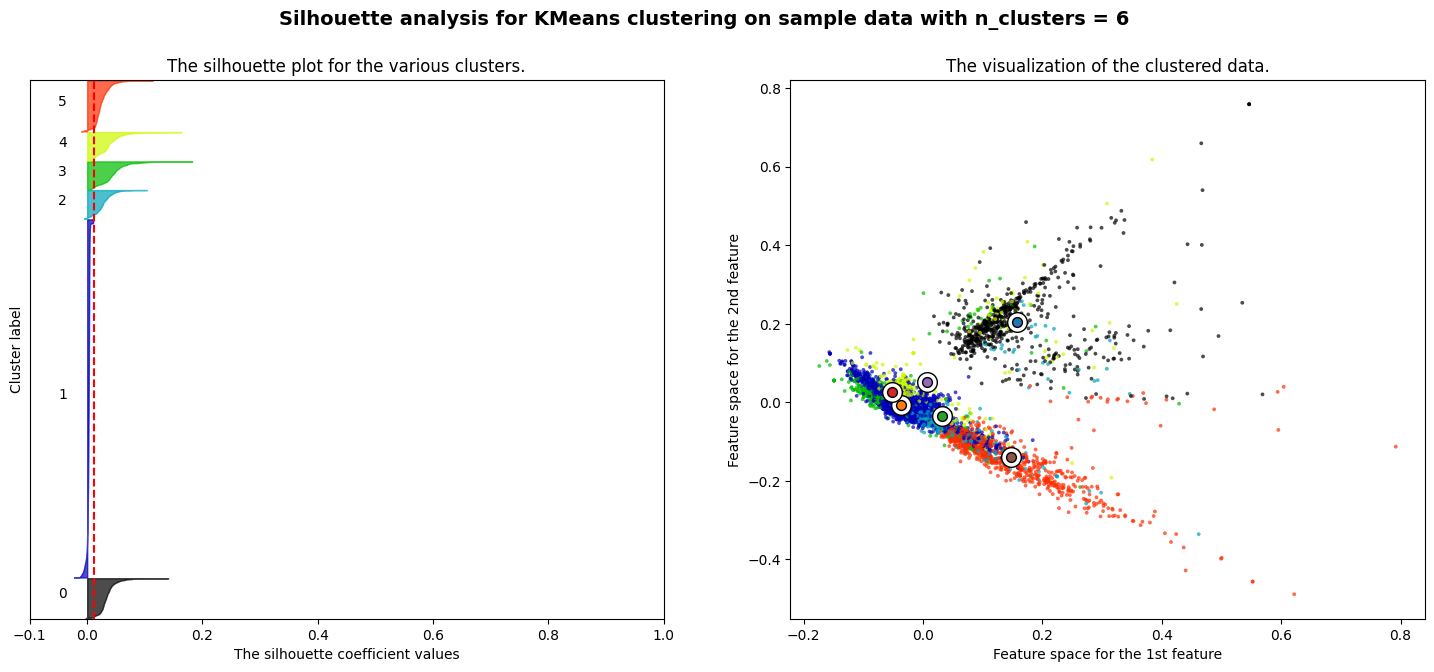

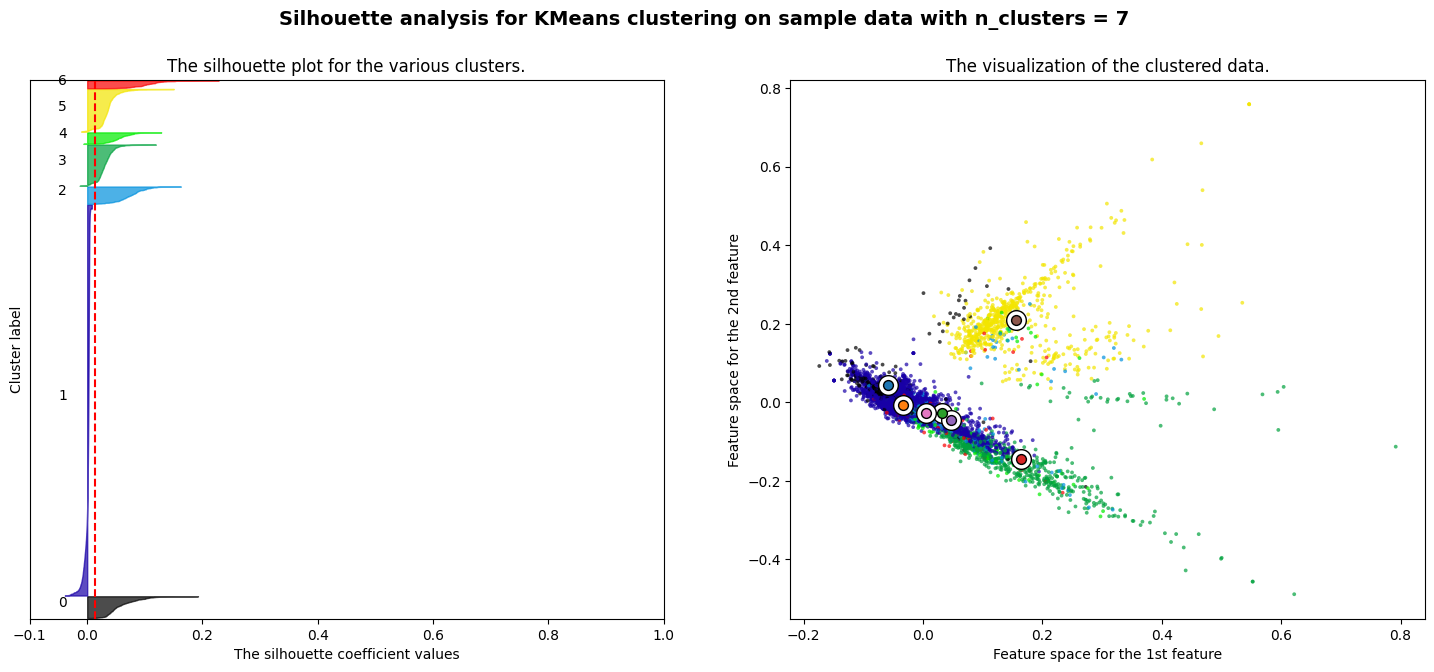

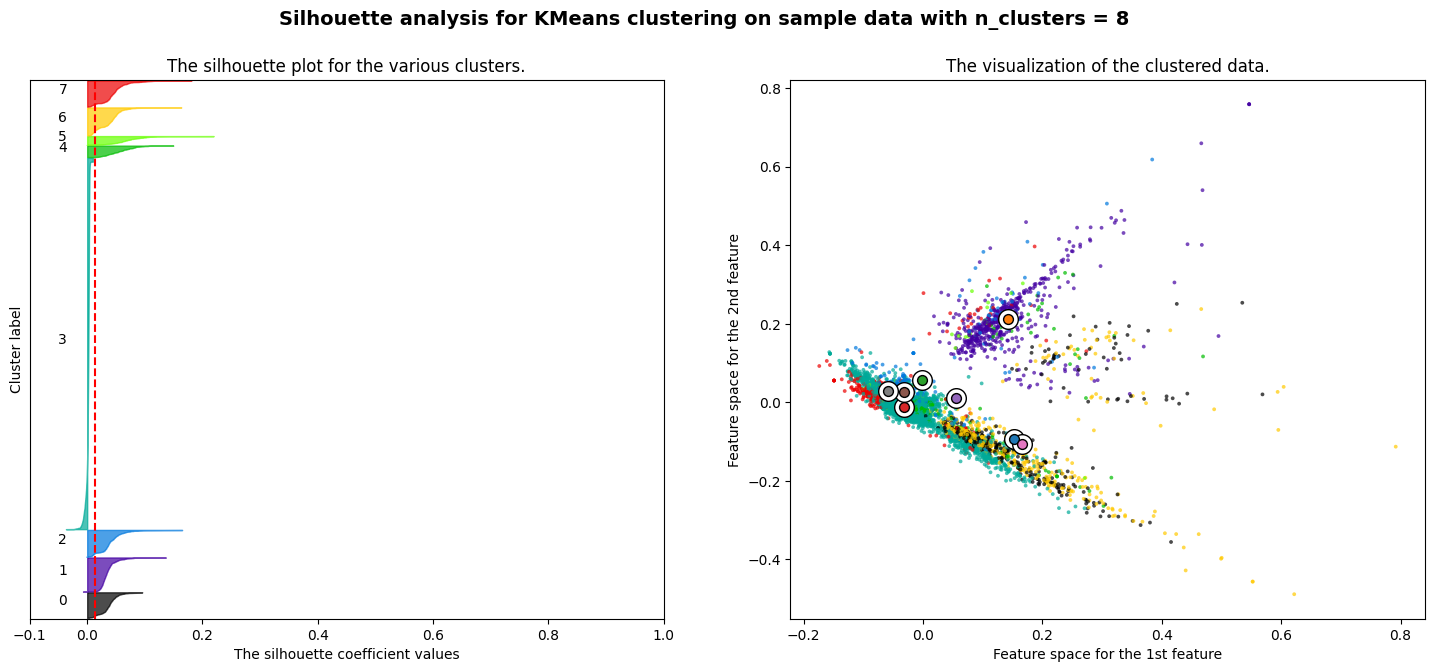

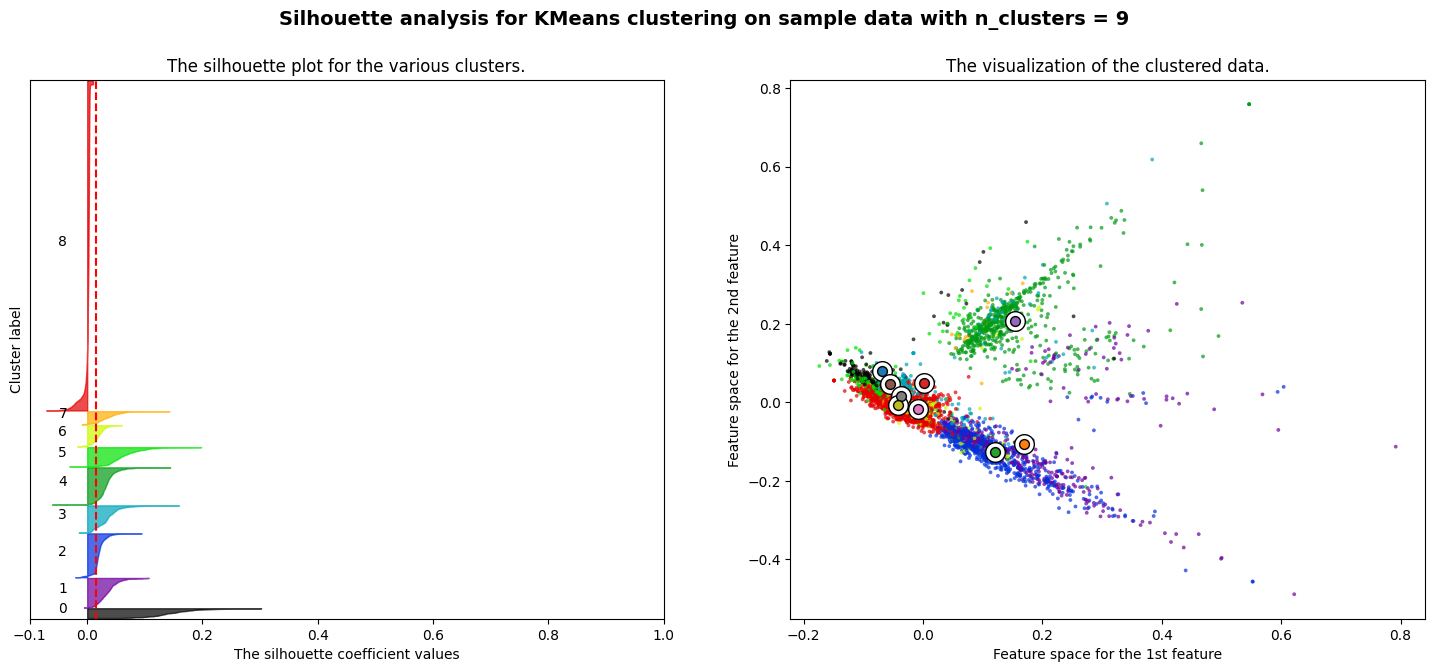

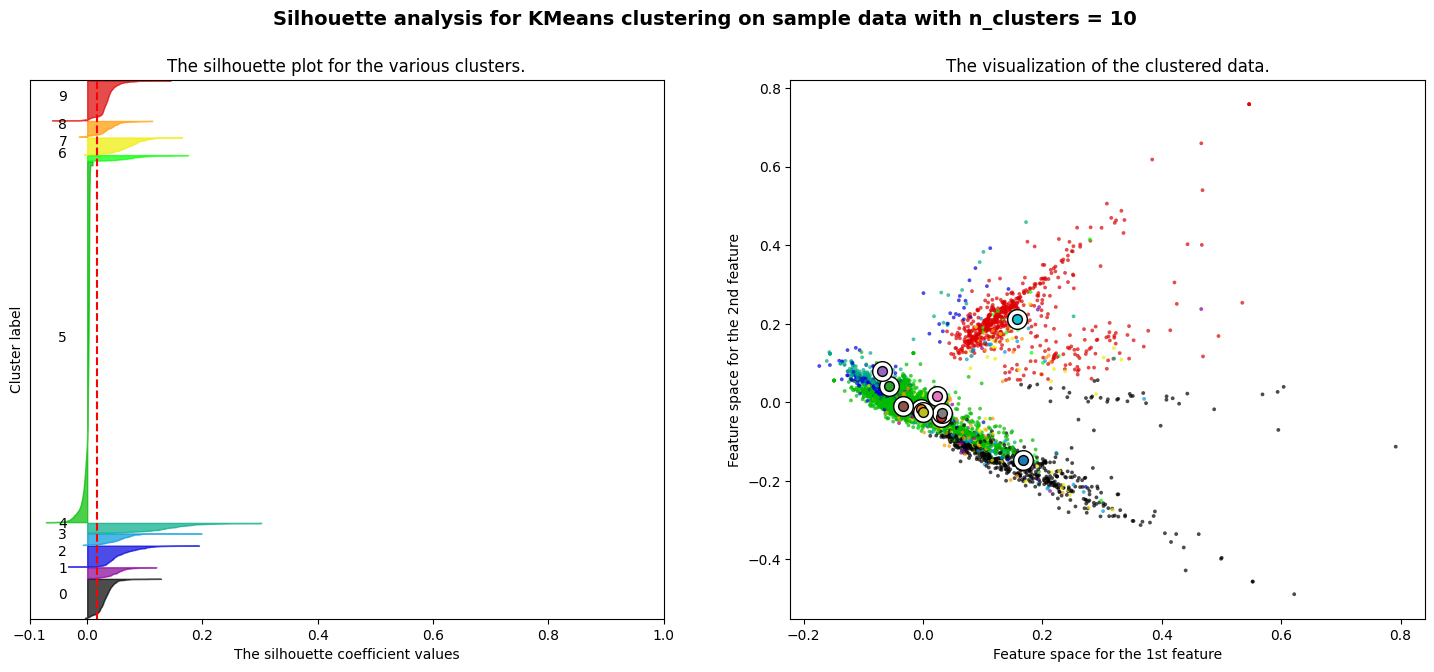

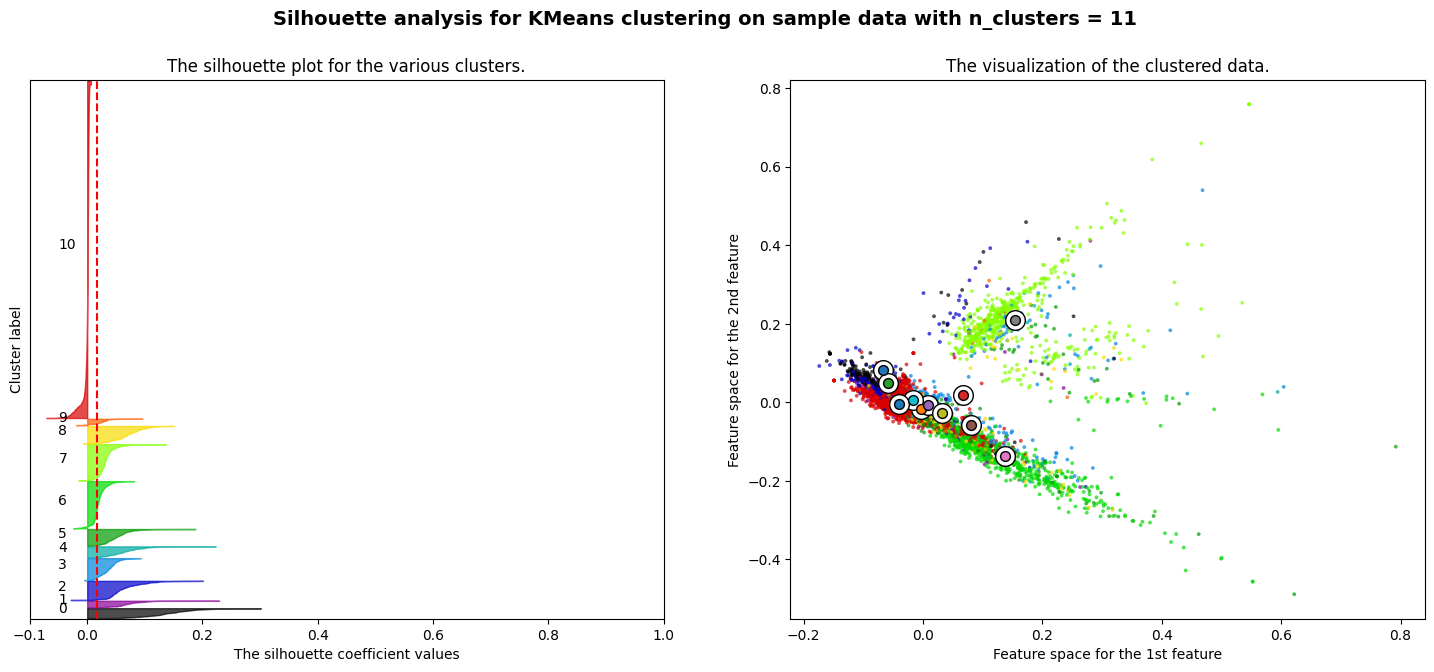

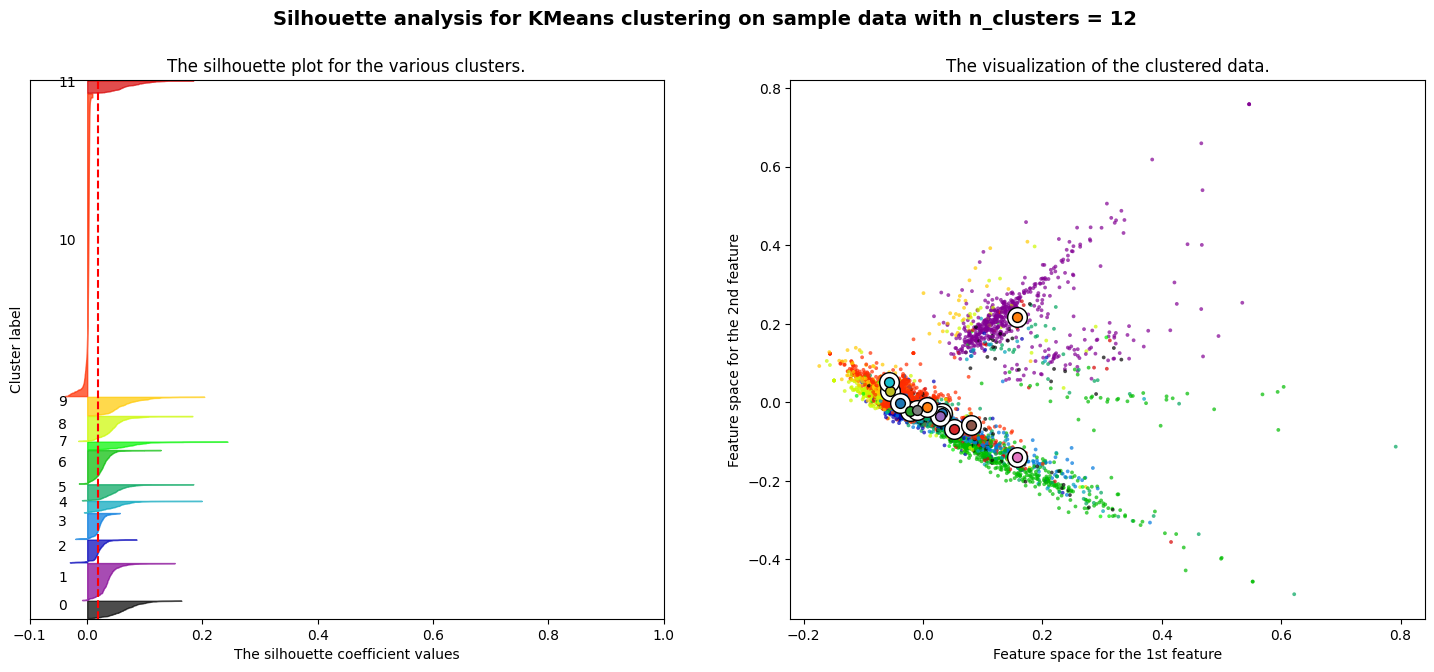

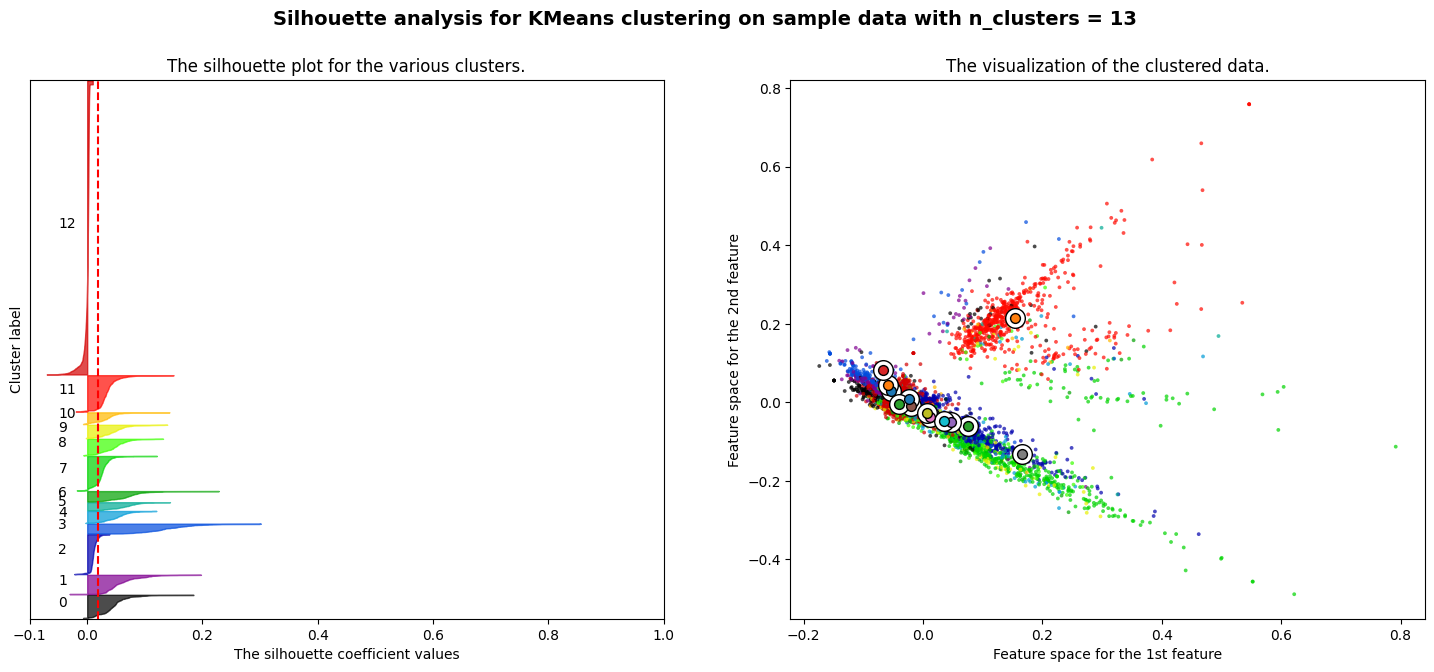

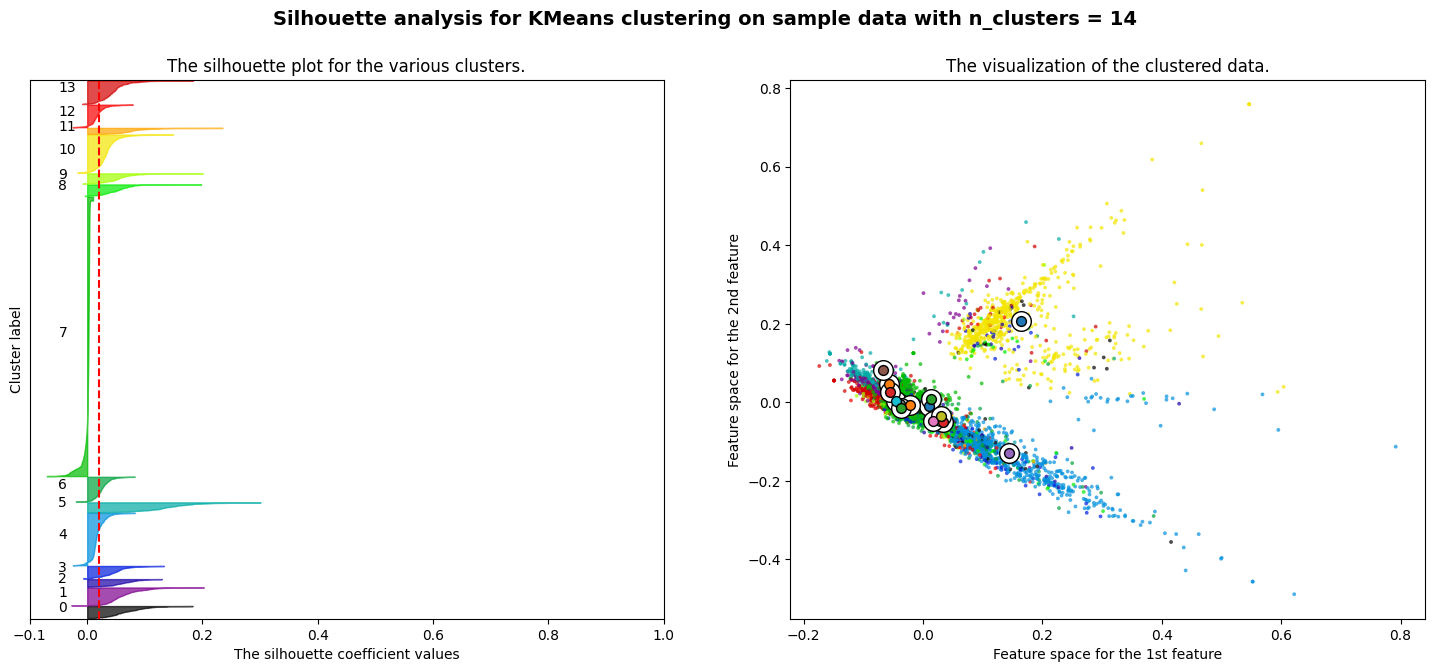

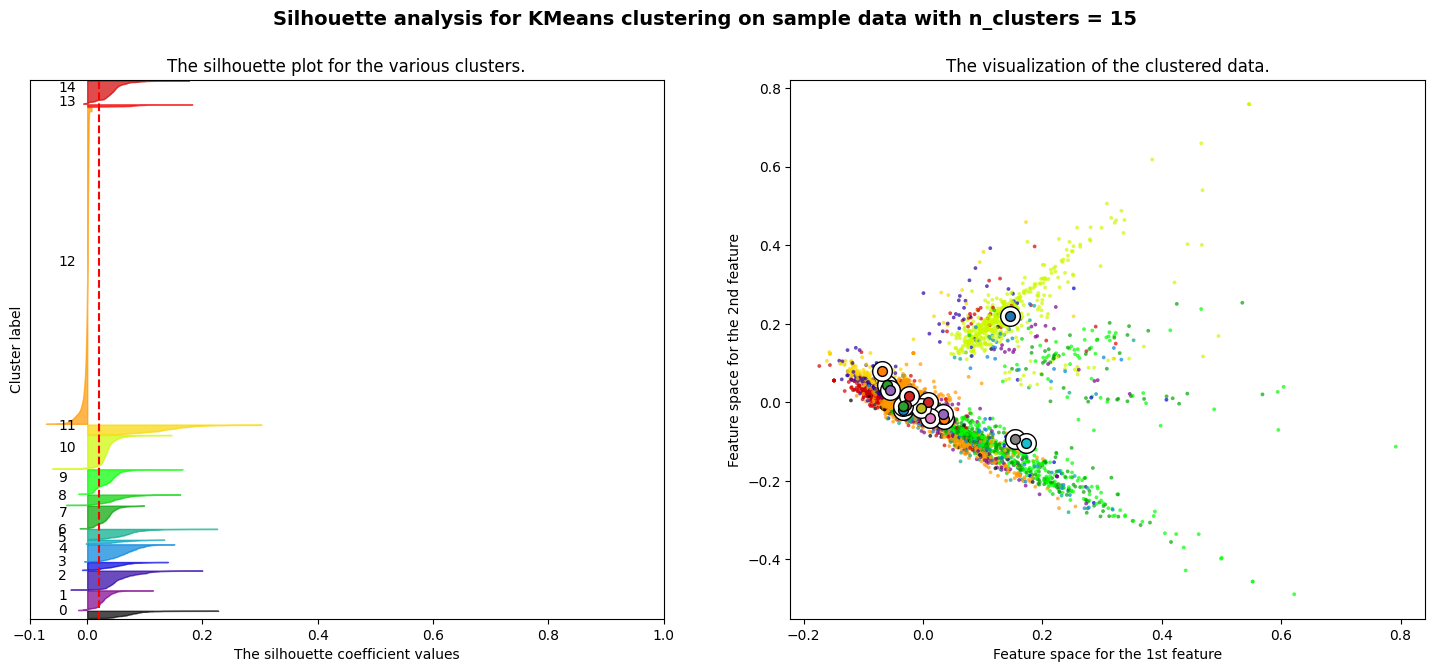

In [73]:
range_n_clusters = [i for i in range(2, 16)]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o', c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='o', alpha=1, s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***